In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Compute the diesel consumption

In [45]:
### Compute the diesel consumption
coefficients = pd.read_csv(r'../../results/optimization-coefficients.csv', low_memory=False)

# Extract attributes from h_BM_coefficients
coefficients[['Scenario', 'Year', 'Trip']] = coefficients['Variable'].str.extract(r"\('(\w+-\w+)', (\d+), (\d+)\)")
coefficients = coefficients.dropna()
coefficients['Year'] = coefficients['Year'].astype(int)

# Convert 'Trip' columns to string type
coefficients['Trip'] = coefficients['Trip'].astype(str)
coefficients.head()

,Powertrain,Variable,Coefficient,Scenario,Year,Trip
0,CDB,"('high-cap', 0, 504451)",0.247132,high-cap,0,504451
1,CDB,"('high-cap', 1, 504451)",0.247132,high-cap,1,504451
2,CDB,"('high-cap', 2, 504451)",0.247132,high-cap,2,504451
3,CDB,"('high-cap', 3, 504451)",0.247132,high-cap,3,504451
4,CDB,"('high-cap', 4, 504451)",0.247132,high-cap,4,504451


In [46]:
h_FE_charging_minues50 = pd.read_csv(r'../../results/sensitivity-analysis/highcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-50.csv', low_memory=False)
h_FE_charging_minues20 = pd.read_csv(r'../../results/sensitivity-analysis/highcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-20.csv', low_memory=False)
h_FE_charging_plus20   = pd.read_csv(r'../../results/sensitivity-analysis/highcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-20.csv', low_memory=False)
h_FE_charging_plus50   = pd.read_csv(r'../../results/sensitivity-analysis/highcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-50.csv', low_memory=False)
h_FE_charging_plus100   = pd.read_csv(r'../../results/sensitivity-analysis/highcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-100.csv', low_memory=False)
h_FE_range_minues50    = pd.read_csv(r'../../results/sensitivity-analysis/highcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-50.csv', low_memory=False)
h_FE_range_minues20    = pd.read_csv(r'../../results/sensitivity-analysis/highcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-20.csv', low_memory=False)
h_FE_range_plus20    = pd.read_csv(r'../../results/sensitivity-analysis/highcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-20.csv', low_memory=False)
h_FE_range_plus100    = pd.read_csv(r'../../results/sensitivity-analysis/highcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-100.csv', low_memory=False)

m_FE_charging_minues50 = pd.read_csv(r'../../results/sensitivity-analysis/midcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-50.csv', low_memory=False)
m_FE_charging_minues20 = pd.read_csv(r'../../results/sensitivity-analysis/midcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-20.csv', low_memory=False)
m_FE_charging_plus20   = pd.read_csv(r'../../results/sensitivity-analysis/midcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-20.csv', low_memory=False)
m_FE_charging_plus50   = pd.read_csv(r'../../results/sensitivity-analysis/midcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-50.csv', low_memory=False)
m_FE_charging_plus100   = pd.read_csv(r'../../results/sensitivity-analysis/midcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-100.csv', low_memory=False)
m_FE_range_minues50    = pd.read_csv(r'../../results/sensitivity-analysis/midcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-50.csv', low_memory=False)
m_FE_range_minues20    = pd.read_csv(r'../../results/sensitivity-analysis/midcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-20.csv', low_memory=False)
m_FE_range_plus20    = pd.read_csv(r'../../results/sensitivity-analysis/midcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-20.csv', low_memory=False)
m_FE_range_plus100    = pd.read_csv(r'../../results/sensitivity-analysis/midcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-100.csv', low_memory=False)

l_FE_charging_minues50 = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-50.csv', low_memory=False)
l_FE_charging_minues20 = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-20.csv', low_memory=False)
l_FE_charging_plus20   = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-20.csv', low_memory=False)
l_FE_charging_plus50   = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-50.csv', low_memory=False)
l_FE_charging_plus100   = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-100.csv', low_memory=False)
l_FE_range_minues50    = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-50.csv', low_memory=False)
l_FE_range_minues20    = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-20.csv', low_memory=False)
l_FE_range_plus20   = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-20.csv', low_memory=False)
l_FE_range_plus100   = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-FE-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-100.csv', low_memory=False)

h_BM_charging_minues50 = pd.read_csv(r'../../results/sensitivity-analysis/highcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-50.csv', low_memory=False)
h_BM_charging_minues20 = pd.read_csv(r'../../results/sensitivity-analysis/highcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-20.csv', low_memory=False)
h_BM_charging_plus20   = pd.read_csv(r'../../results/sensitivity-analysis/highcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-20.csv', low_memory=False)
h_BM_charging_plus50   = pd.read_csv(r'../../results/sensitivity-analysis/highcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-50.csv', low_memory=False)
h_BM_charging_plus100   = pd.read_csv(r'../../results/sensitivity-analysis/highcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-100.csv', low_memory=False)
h_BM_range_minues50    = pd.read_csv(r'../../results/sensitivity-analysis/highcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-50.csv', low_memory=False)
h_BM_range_minues20    = pd.read_csv(r'../../results/sensitivity-analysis/highcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-20.csv', low_memory=False)
h_BM_range_plus20   = pd.read_csv(r'../../results/sensitivity-analysis/highcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-20.csv', low_memory=False)
h_BM_range_plus100   = pd.read_csv(r'../../results/sensitivity-analysis/highcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-100.csv', low_memory=False)


m_BM_charging_minues50 = pd.read_csv(r'../../results/sensitivity-analysis/midcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-50.csv', low_memory=False)
m_BM_charging_minues20 = pd.read_csv(r'../../results/sensitivity-analysis/midcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-20.csv', low_memory=False)
m_BM_charging_plus20   = pd.read_csv(r'../../results/sensitivity-analysis/midcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-20.csv', low_memory=False)
m_BM_charging_plus50   = pd.read_csv(r'../../results/sensitivity-analysis/midcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-50.csv', low_memory=False)
m_BM_charging_plus100   = pd.read_csv(r'../../results/sensitivity-analysis/midcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-100.csv', low_memory=False)
#m_BM_range_minues50    = pd.read_csv(r'../../results/sensitivity-analysis/midcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-50.csv', low_memory=False)
m_BM_range_minues20    = pd.read_csv(r'../../results/sensitivity-analysis/midcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-20.csv', low_memory=False)
m_BM_range_plus20   = pd.read_csv(r'../../results/sensitivity-analysis/midcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-20.csv', low_memory=False)
m_BM_range_plus100   = pd.read_csv(r'../../results/sensitivity-analysis/midcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-100.csv', low_memory=False)


l_BM_charging_minues50 = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-50.csv', low_memory=False)
l_BM_charging_minues20 = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-minus-20.csv', low_memory=False)
l_BM_charging_plus20   = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-20.csv', low_memory=False)
l_BM_charging_plus50   = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-50.csv', low_memory=False)
l_BM_charging_plus100   = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-charging-plus-100.csv', low_memory=False)
l_BM_range_minues50    = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-50.csv', low_memory=False)
l_BM_range_minues20    = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-minus-20.csv', low_memory=False)
l_BM_range_plus20    = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-20.csv', low_memory=False)
l_BM_range_plus100    = pd.read_csv(r'../../results/sensitivity-analysis/lowcap-BM-optimized-variables-with-replacement-40percentBEBcharging-sensitivity-range-plus-100.csv', low_memory=False)

In [47]:
h_FE_charging_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_FE_charging_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_FE_charging_minues50 = h_FE_charging_minues50.dropna()
h_FE_charging_minues50['Year'] = h_FE_charging_minues50['Year'].astype(int).copy()
h_FE_charging_minues50['Trip'] = h_FE_charging_minues50['Trip'].astype(str)


h_FE_charging_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_FE_charging_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_FE_charging_minues20 = h_FE_charging_minues20.dropna()
h_FE_charging_minues20['Year'] = h_FE_charging_minues20['Year'].astype(int).copy()
h_FE_charging_minues20['Trip'] = h_FE_charging_minues20['Trip'].astype(str)


h_FE_charging_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_FE_charging_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_FE_charging_plus20 = h_FE_charging_plus20.dropna()
h_FE_charging_plus20['Year'] = h_FE_charging_plus20['Year'].astype(int).copy()
h_FE_charging_plus20['Trip'] = h_FE_charging_plus20['Trip'].astype(str)

h_FE_charging_plus50[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_FE_charging_plus50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_FE_charging_plus50 = h_FE_charging_plus50.dropna()
h_FE_charging_plus50['Year'] = h_FE_charging_plus50['Year'].astype(int).copy()
h_FE_charging_plus50['Trip'] = h_FE_charging_plus50['Trip'].astype(str)


h_FE_charging_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_FE_charging_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_FE_charging_plus100 = h_FE_charging_plus100.dropna()
h_FE_charging_plus100['Year'] = h_FE_charging_plus100['Year'].astype(int).copy()
h_FE_charging_plus100['Trip'] = h_FE_charging_plus100['Trip'].astype(str)


h_FE_range_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_FE_range_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_FE_range_minues50 = h_FE_range_minues50.dropna()
h_FE_range_minues50['Year'] = h_FE_range_minues50['Year'].astype(int).copy()
h_FE_range_minues50['Trip'] = h_FE_range_minues50['Trip'].astype(str)


h_FE_range_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_FE_range_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_FE_range_minues20 = h_FE_range_minues20.dropna()
h_FE_range_minues20['Year'] = h_FE_range_minues20['Year'].astype(int).copy()
h_FE_range_minues20['Trip'] = h_FE_range_minues20['Trip'].astype(str)


h_FE_range_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_FE_range_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_FE_range_plus20 = h_FE_range_plus20.dropna()
h_FE_range_plus20['Year'] = h_FE_range_plus20['Year'].astype(int).copy()
h_FE_range_plus20['Trip'] = h_FE_range_plus20['Trip'].astype(str)


h_FE_range_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_FE_range_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_FE_range_plus100 = h_FE_range_plus100.dropna()
h_FE_range_plus100['Year'] = h_FE_range_plus100['Year'].astype(int).copy()
h_FE_range_plus100['Trip'] = h_FE_range_plus100['Trip'].astype(str)


m_FE_charging_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_FE_charging_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_FE_charging_minues50 = m_FE_charging_minues50.dropna()
m_FE_charging_minues50['Year'] = m_FE_charging_minues50['Year'].astype(int).copy()
m_FE_charging_minues50['Trip'] = m_FE_charging_minues50['Trip'].astype(str)


m_FE_charging_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_FE_charging_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_FE_charging_minues20 = m_FE_charging_minues20.dropna()
m_FE_charging_minues20['Year'] = m_FE_charging_minues20['Year'].astype(int).copy()
m_FE_charging_minues20['Trip'] = m_FE_charging_minues20['Trip'].astype(str)


m_FE_charging_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_FE_charging_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_FE_charging_plus20 = m_FE_charging_plus20.dropna()
m_FE_charging_plus20['Year'] = m_FE_charging_plus20['Year'].astype(int).copy()
m_FE_charging_plus20['Trip'] = m_FE_charging_plus20['Trip'].astype(str)

m_FE_charging_plus50[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_FE_charging_plus50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_FE_charging_plus50 = m_FE_charging_plus50.dropna()
m_FE_charging_plus50['Year'] = m_FE_charging_plus50['Year'].astype(int).copy()
m_FE_charging_plus50['Trip'] = m_FE_charging_plus50['Trip'].astype(str)


m_FE_charging_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_FE_charging_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_FE_charging_plus100 = m_FE_charging_plus100.dropna()
m_FE_charging_plus100['Year'] = m_FE_charging_plus100['Year'].astype(int).copy()
m_FE_charging_plus100['Trip'] = m_FE_charging_plus100['Trip'].astype(str)


m_FE_range_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_FE_range_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_FE_range_minues50 = m_FE_range_minues50.dropna()
m_FE_range_minues50['Year'] = m_FE_range_minues50['Year'].astype(int).copy()
m_FE_range_minues50['Trip'] = m_FE_range_minues50['Trip'].astype(str)


m_FE_range_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_FE_range_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_FE_range_minues20 = m_FE_range_minues20.dropna()
m_FE_range_minues20['Year'] = m_FE_range_minues20['Year'].astype(int).copy()
m_FE_range_minues20['Trip'] = m_FE_range_minues20['Trip'].astype(str)


m_FE_range_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_FE_range_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_FE_range_plus20 = m_FE_range_plus20.dropna()
m_FE_range_plus20['Year'] = m_FE_range_plus20['Year'].astype(int).copy()
m_FE_range_plus20['Trip'] = m_FE_range_plus20['Trip'].astype(str)


m_FE_range_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_FE_range_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_FE_range_plus100 = m_FE_range_plus100.dropna()
m_FE_range_plus100['Year'] = m_FE_range_plus100['Year'].astype(int).copy()
m_FE_range_plus100['Trip'] = m_FE_range_plus100['Trip'].astype(str)


l_FE_charging_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_FE_charging_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_FE_charging_minues50 = l_FE_charging_minues50.dropna()
l_FE_charging_minues50['Year'] = l_FE_charging_minues50['Year'].astype(int).copy()
l_FE_charging_minues50['Trip'] = l_FE_charging_minues50['Trip'].astype(str)


l_FE_charging_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_FE_charging_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_FE_charging_minues20 = l_FE_charging_minues20.dropna()
l_FE_charging_minues20['Year'] = l_FE_charging_minues20['Year'].astype(int).copy()
l_FE_charging_minues20['Trip'] = l_FE_charging_minues20['Trip'].astype(str)


l_FE_charging_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_FE_charging_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_FE_charging_plus20 = l_FE_charging_plus20.dropna()
l_FE_charging_plus20['Year'] = l_FE_charging_plus20['Year'].astype(int).copy()
l_FE_charging_plus20['Trip'] = l_FE_charging_plus20['Trip'].astype(str)

l_FE_charging_plus50[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_FE_charging_plus50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_FE_charging_plus50 = l_FE_charging_plus50.dropna()
l_FE_charging_plus50['Year'] = l_FE_charging_plus50['Year'].astype(int).copy()
l_FE_charging_plus50['Trip'] = l_FE_charging_plus50['Trip'].astype(str)

l_FE_charging_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_FE_charging_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_FE_charging_plus100 = l_FE_charging_plus100.dropna()
l_FE_charging_plus100['Year'] = l_FE_charging_plus100['Year'].astype(int).copy()
l_FE_charging_plus100['Trip'] = l_FE_charging_plus100['Trip'].astype(str)


l_FE_range_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_FE_range_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_FE_range_minues50 = l_FE_range_minues50.dropna()
l_FE_range_minues50['Year'] = l_FE_range_minues50['Year'].astype(int).copy()
l_FE_range_minues50['Trip'] = l_FE_range_minues50['Trip'].astype(str)

l_FE_range_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_FE_range_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_FE_range_minues20 = l_FE_range_minues20.dropna()
l_FE_range_minues20['Year'] = l_FE_range_minues20['Year'].astype(int).copy()
l_FE_range_minues20['Trip'] = l_FE_range_minues20['Trip'].astype(str)


l_FE_range_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_FE_range_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_FE_range_plus20 = l_FE_range_plus20.dropna()
l_FE_range_plus20['Year'] = l_FE_range_plus20['Year'].astype(int).copy()
l_FE_range_plus20['Trip'] = l_FE_range_plus20['Trip'].astype(str)

l_FE_range_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_FE_range_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_FE_range_plus100 = l_FE_range_plus100.dropna()
l_FE_range_plus100['Year'] = l_FE_range_plus100['Year'].astype(int).copy()
l_FE_range_plus100['Trip'] = l_FE_range_plus100['Trip'].astype(str)


h_BM_charging_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_BM_charging_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_BM_charging_minues50 = h_BM_charging_minues50.dropna()
h_BM_charging_minues50['Year'] = h_BM_charging_minues50['Year'].astype(int).copy()
h_BM_charging_minues50['Trip'] = h_BM_charging_minues50['Trip'].astype(str)


h_BM_charging_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_BM_charging_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_BM_charging_minues20 = h_BM_charging_minues20.dropna()
h_BM_charging_minues20['Year'] = h_BM_charging_minues20['Year'].astype(int).copy()
h_BM_charging_minues20['Trip'] = h_BM_charging_minues20['Trip'].astype(str)


h_BM_charging_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_BM_charging_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_BM_charging_plus20 = h_BM_charging_plus20.dropna()
h_BM_charging_plus20['Year'] = h_BM_charging_plus20['Year'].astype(int).copy()
h_BM_charging_plus20['Trip'] = h_BM_charging_plus20['Trip'].astype(str)

h_BM_charging_plus50[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_BM_charging_plus50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_BM_charging_plus50 = h_BM_charging_plus50.dropna()
h_BM_charging_plus50['Year'] = h_BM_charging_plus50['Year'].astype(int).copy()
h_BM_charging_plus50['Trip'] = h_BM_charging_plus50['Trip'].astype(str)

h_BM_charging_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_BM_charging_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_BM_charging_plus100 = h_BM_charging_plus100.dropna()
h_BM_charging_plus100['Year'] = h_BM_charging_plus100['Year'].astype(int).copy()
h_BM_charging_plus100['Trip'] = h_BM_charging_plus100['Trip'].astype(str)


h_BM_range_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_BM_range_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_BM_range_minues50 = h_BM_range_minues50.dropna()
h_BM_range_minues50['Year'] = h_BM_range_minues50['Year'].astype(int).copy()
h_BM_range_minues50['Trip'] = h_BM_range_minues50['Trip'].astype(str)

h_BM_range_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_BM_range_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_BM_range_minues20 = h_BM_range_minues20.dropna()
h_BM_range_minues20['Year'] = h_BM_range_minues20['Year'].astype(int).copy()
h_BM_range_minues20['Trip'] = h_BM_range_minues20['Trip'].astype(str)


h_BM_range_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_BM_range_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_BM_range_plus20 = h_BM_range_plus20.dropna()
h_BM_range_plus20['Year'] = h_BM_range_plus20['Year'].astype(int).copy()
h_BM_range_plus20['Trip'] = h_BM_range_plus20['Trip'].astype(str)


h_BM_range_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_BM_range_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
h_BM_range_plus100 = h_BM_range_plus100.dropna()
h_BM_range_plus100['Year'] = h_BM_range_plus100['Year'].astype(int).copy()
h_BM_range_plus100['Trip'] = h_BM_range_plus100['Trip'].astype(str)


m_BM_charging_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_BM_charging_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_BM_charging_minues50 = m_BM_charging_minues50.dropna()
m_BM_charging_minues50['Year'] = m_BM_charging_minues50['Year'].astype(int).copy()
m_BM_charging_minues50['Trip'] = m_BM_charging_minues50['Trip'].astype(str)


m_BM_charging_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_BM_charging_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_BM_charging_minues20 = m_BM_charging_minues20.dropna()
m_BM_charging_minues20['Year'] = m_BM_charging_minues20['Year'].astype(int).copy()
m_BM_charging_minues20['Trip'] = m_BM_charging_minues20['Trip'].astype(str)


m_BM_charging_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_BM_charging_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_BM_charging_plus20 = m_BM_charging_plus20.dropna()
m_BM_charging_plus20['Year'] = m_BM_charging_plus20['Year'].astype(int).copy()
m_BM_charging_plus20['Trip'] = m_BM_charging_plus20['Trip'].astype(str)

m_BM_charging_plus50[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_BM_charging_plus50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_BM_charging_plus50 = m_BM_charging_plus50.dropna()
m_BM_charging_plus50['Year'] = m_BM_charging_plus50['Year'].astype(int).copy()
m_BM_charging_plus50['Trip'] = m_BM_charging_plus50['Trip'].astype(str)


m_BM_charging_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_BM_charging_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_BM_charging_plus100 = m_BM_charging_plus100.dropna()
m_BM_charging_plus100['Year'] = m_BM_charging_plus100['Year'].astype(int).copy()
m_BM_charging_plus100['Trip'] = m_BM_charging_plus100['Trip'].astype(str)


#m_BM_range_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_BM_range_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
#m_BM_range_minues50 = m_BM_range_minues50.dropna()
#m_BM_range_minues50['Year'] = m_BM_range_minues50['Year'].astype(int).copy()
#m_BM_range_minues50['Trip'] = m_BM_range_minues50['Trip'].astype(str)


m_BM_range_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_BM_range_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_BM_range_minues20 = m_BM_range_minues20.dropna()
m_BM_range_minues20['Year'] = m_BM_range_minues20['Year'].astype(int).copy()
m_BM_range_minues20['Trip'] = m_BM_range_minues20['Trip'].astype(str)


m_BM_range_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_BM_range_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_BM_range_plus20 = m_BM_range_plus20.dropna()
m_BM_range_plus20['Year'] = m_BM_range_plus20['Year'].astype(int).copy()
m_BM_range_plus20['Trip'] = m_BM_range_plus20['Trip'].astype(str)


m_BM_range_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_BM_range_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
m_BM_range_plus100 = m_BM_range_plus100.dropna()
m_BM_range_plus100['Year'] = m_BM_range_plus100['Year'].astype(int).copy()
m_BM_range_plus100['Trip'] = m_BM_range_plus100['Trip'].astype(str)



l_BM_charging_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_BM_charging_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_BM_charging_minues50 = l_BM_charging_minues50.dropna()
l_BM_charging_minues50['Year'] = l_BM_charging_minues50['Year'].astype(int).copy()
l_BM_charging_minues50['Trip'] = l_BM_charging_minues50['Trip'].astype(str)


l_BM_charging_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_BM_charging_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_BM_charging_minues20 = l_BM_charging_minues20.dropna()
l_BM_charging_minues20['Year'] = l_BM_charging_minues20['Year'].astype(int).copy()
l_BM_charging_minues20['Trip'] = l_BM_charging_minues20['Trip'].astype(str)


l_BM_charging_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_BM_charging_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_BM_charging_plus20 = l_BM_charging_plus20.dropna()
l_BM_charging_plus20['Year'] = l_BM_charging_plus20['Year'].astype(int).copy()
l_BM_charging_plus20['Trip'] = l_BM_charging_plus20['Trip'].astype(str)

l_BM_charging_plus50[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_BM_charging_plus50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_BM_charging_plus50 = l_BM_charging_plus50.dropna()
l_BM_charging_plus50['Year'] = l_BM_charging_plus50['Year'].astype(int).copy()
l_BM_charging_plus50['Trip'] = l_BM_charging_plus50['Trip'].astype(str)


l_BM_charging_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_BM_charging_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_BM_charging_plus100 = l_BM_charging_plus100.dropna()
l_BM_charging_plus100['Year'] = l_BM_charging_plus100['Year'].astype(int).copy()
l_BM_charging_plus100['Trip'] = l_BM_charging_plus100['Trip'].astype(str)


l_BM_range_minues50[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_BM_range_minues50['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_BM_range_minues50 = l_BM_range_minues50.dropna()
l_BM_range_minues50['Year'] = l_BM_range_minues50['Year'].astype(int).copy()
l_BM_range_minues50['Trip'] = l_BM_range_minues50['Trip'].astype(str)


l_BM_range_minues20[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_BM_range_minues20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_BM_range_minues20 = l_BM_range_minues20.dropna()
l_BM_range_minues20['Year'] = l_BM_range_minues20['Year'].astype(int).copy()
l_BM_range_minues20['Trip'] = l_BM_range_minues20['Trip'].astype(str)


l_BM_range_plus20[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_BM_range_plus20['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_BM_range_plus20 = l_BM_range_plus20.dropna()
l_BM_range_plus20['Year'] = l_BM_range_plus20['Year'].astype(int).copy()
l_BM_range_plus20['Trip'] = l_BM_range_plus20['Trip'].astype(str)


l_BM_range_plus100[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_BM_range_plus100['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')
l_BM_range_plus100 = l_BM_range_plus100.dropna()
l_BM_range_plus100['Year'] = l_BM_range_plus100['Year'].astype(int).copy()
l_BM_range_plus100['Trip'] = l_BM_range_plus100['Trip'].astype(str)



In [48]:
h_FE_charging_minues50 = h_FE_charging_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_FE_charging_minues20 = h_FE_charging_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_FE_charging_plus20 = h_FE_charging_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_FE_charging_plus50 = h_FE_charging_plus50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_FE_charging_plus100 = h_FE_charging_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_FE_range_minues50 = h_FE_range_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_FE_range_minues20 = h_FE_range_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_FE_range_plus20 = h_FE_range_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_FE_range_plus100 = h_FE_range_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')



m_FE_charging_minues50 = m_FE_charging_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_FE_charging_minues20 = m_FE_charging_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_FE_charging_plus20 = m_FE_charging_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_FE_charging_plus50 = m_FE_charging_plus50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_FE_charging_plus100 = m_FE_charging_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_FE_range_minues50 = m_FE_range_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_FE_range_minues20 = m_FE_range_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_FE_range_plus20 = m_FE_range_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_FE_range_plus100 = m_FE_range_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')



l_FE_charging_minues50 = l_FE_charging_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_FE_charging_minues20 = l_FE_charging_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_FE_charging_plus20 = l_FE_charging_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_FE_charging_plus50 = l_FE_charging_plus50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_FE_charging_plus100 = l_FE_charging_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_FE_range_minues50 = l_FE_range_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_FE_range_minues20 = l_FE_range_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_FE_range_plus20 = l_FE_range_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_FE_range_plus100 = l_FE_range_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')



h_BM_charging_minues50 = h_BM_charging_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_BM_charging_minues20 = h_BM_charging_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_BM_charging_plus20 = h_BM_charging_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_BM_charging_plus50 = h_BM_charging_plus50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_BM_charging_plus100 = h_BM_charging_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_BM_range_minues50 = h_BM_range_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_BM_range_minues20 = h_BM_range_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_BM_range_plus20 = h_BM_range_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

h_BM_range_plus100 = h_BM_range_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')



m_BM_charging_minues50 = m_BM_charging_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_BM_charging_minues20 = m_BM_charging_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_BM_charging_plus20 = m_BM_charging_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_BM_charging_plus50 = m_BM_charging_plus50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_BM_charging_plus100 = m_BM_charging_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

#m_BM_range_minues50 = m_BM_range_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_BM_range_minues20 = m_BM_range_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_BM_range_plus20 = m_BM_range_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

m_BM_range_plus100 = m_BM_range_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')



l_BM_charging_minues50 = l_BM_charging_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_BM_charging_minues20 = l_BM_charging_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_BM_charging_plus20 = l_BM_charging_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_BM_charging_plus50 = l_BM_charging_plus50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_BM_charging_plus100 = l_BM_charging_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_BM_range_minues50 = l_BM_range_minues50.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_BM_range_minues20 = l_BM_range_minues20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_BM_range_plus20 = l_BM_range_plus20.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')

l_BM_range_plus100 = l_BM_range_plus100.merge(coefficients[['Powertrain','Year', 'Trip', 'Coefficient']], on=['Powertrain','Year', 'Trip',], how='left')



In [49]:
# Calculate sum for each Year for each DataFrame
h_FE_charging_minues50['Result'] = h_FE_charging_minues50['Value'] * h_FE_charging_minues50['Coefficient']
h_FE_charging_minues50_sum = h_FE_charging_minues50.groupby('Year')['Result'].sum().reset_index()

h_FE_charging_minues20['Result'] = h_FE_charging_minues20['Value'] * h_FE_charging_minues20['Coefficient']
h_FE_charging_minues20_sum = h_FE_charging_minues20.groupby('Year')['Result'].sum().reset_index()

h_FE_charging_plus20['Result'] = h_FE_charging_plus20['Value'] * h_FE_charging_plus20['Coefficient']
h_FE_charging_plus20_sum = h_FE_charging_plus20.groupby('Year')['Result'].sum().reset_index()

h_FE_charging_plus50['Result'] = h_FE_charging_plus50['Value'] * h_FE_charging_plus50['Coefficient']
h_FE_charging_plus50_sum = h_FE_charging_plus50.groupby('Year')['Result'].sum().reset_index()

h_FE_charging_plus100['Result'] = h_FE_charging_plus100['Value'] * h_FE_charging_plus100['Coefficient']
h_FE_charging_plus100_sum = h_FE_charging_plus100.groupby('Year')['Result'].sum().reset_index()

h_FE_range_minues50['Result'] = h_FE_range_minues50['Value'] * h_FE_range_minues50['Coefficient']
h_FE_range_minues50_sum = h_FE_range_minues50.groupby('Year')['Result'].sum().reset_index()

h_FE_range_minues20['Result'] = h_FE_range_minues20['Value'] * h_FE_range_minues20['Coefficient']
h_FE_range_minues20_sum = h_FE_range_minues20.groupby('Year')['Result'].sum().reset_index()

h_FE_range_plus20['Result'] = h_FE_range_plus20['Value'] * h_FE_range_plus20['Coefficient']
h_FE_range_plus20_sum = h_FE_range_plus20.groupby('Year')['Result'].sum().reset_index()

h_FE_range_plus100['Result'] = h_FE_range_plus100['Value'] * h_FE_range_plus100['Coefficient']
h_FE_range_plus100_sum = h_FE_range_plus100.groupby('Year')['Result'].sum().reset_index()


m_FE_charging_minues50['Result'] = m_FE_charging_minues50['Value'] * m_FE_charging_minues50['Coefficient']
m_FE_charging_minues50_sum = m_FE_charging_minues50.groupby('Year')['Result'].sum().reset_index()

m_FE_charging_minues20['Result'] = m_FE_charging_minues20['Value'] * m_FE_charging_minues20['Coefficient']
m_FE_charging_minues20_sum = m_FE_charging_minues20.groupby('Year')['Result'].sum().reset_index()


m_FE_charging_plus20['Result'] = m_FE_charging_plus20['Value'] * h_FE_charging_plus20['Coefficient']
m_FE_charging_plus20_sum = m_FE_charging_plus20.groupby('Year')['Result'].sum().reset_index()

m_FE_charging_plus50['Result'] = m_FE_charging_plus50['Value'] * h_FE_charging_plus50['Coefficient']
m_FE_charging_plus50_sum = m_FE_charging_plus50.groupby('Year')['Result'].sum().reset_index()

m_FE_charging_plus100['Result'] = m_FE_charging_plus100['Value'] * h_FE_charging_plus100['Coefficient']
m_FE_charging_plus100_sum = m_FE_charging_plus100.groupby('Year')['Result'].sum().reset_index()


m_FE_range_minues50['Result'] = m_FE_range_minues50['Value'] * h_FE_charging_minues50['Coefficient']
m_FE_range_minues50_sum = m_FE_range_minues50.groupby('Year')['Result'].sum().reset_index()


m_FE_range_minues20['Result'] = m_FE_range_minues20['Value'] * h_FE_charging_minues20['Coefficient']
m_FE_range_minues20_sum = m_FE_range_minues20.groupby('Year')['Result'].sum().reset_index()


m_FE_range_plus20['Result'] = m_FE_range_plus20['Value'] * m_FE_range_plus20['Coefficient']
m_FE_range_plus20_sum = m_FE_range_plus20.groupby('Year')['Result'].sum().reset_index()

m_FE_range_plus100['Result'] = m_FE_range_plus100['Value'] * m_FE_range_plus100['Coefficient']
m_FE_range_plus100_sum = m_FE_range_plus100.groupby('Year')['Result'].sum().reset_index()


l_FE_charging_minues50['Result'] = l_FE_charging_minues50['Value'] * l_FE_charging_minues50['Coefficient']
l_FE_charging_minues50_sum = l_FE_charging_minues50.groupby('Year')['Result'].sum().reset_index()


l_FE_charging_minues20['Result'] = l_FE_charging_minues20['Value'] * l_FE_charging_minues20['Coefficient']
l_FE_charging_minues20_sum = l_FE_charging_minues20.groupby('Year')['Result'].sum().reset_index()


l_FE_charging_plus20['Result'] = l_FE_charging_plus20['Value'] * l_FE_charging_plus20['Coefficient']
l_FE_charging_plus20_sum = l_FE_charging_plus20.groupby('Year')['Result'].sum().reset_index()

l_FE_charging_plus50['Result'] = l_FE_charging_plus50['Value'] * l_FE_charging_plus50['Coefficient']
l_FE_charging_plus50_sum = l_FE_charging_plus50.groupby('Year')['Result'].sum().reset_index()

l_FE_charging_plus100['Result'] = l_FE_charging_plus100['Value'] * l_FE_charging_plus100['Coefficient']
l_FE_charging_plus100_sum = l_FE_charging_plus100.groupby('Year')['Result'].sum().reset_index()


l_FE_range_minues50['Result'] = l_FE_range_minues50['Value'] * l_FE_range_minues50['Coefficient']
l_FE_range_minues50_sum = l_FE_range_minues50.groupby('Year')['Result'].sum().reset_index()


l_FE_range_minues20['Result'] = l_FE_range_minues20['Value'] * l_FE_range_minues20['Coefficient']
l_FE_range_minues20_sum = l_FE_range_minues20.groupby('Year')['Result'].sum().reset_index()


l_FE_range_plus20['Result'] = l_FE_range_plus20['Value'] * l_FE_range_plus20['Coefficient']
l_FE_range_plus20_sum = l_FE_range_plus20.groupby('Year')['Result'].sum().reset_index()

l_FE_range_plus100['Result'] = l_FE_range_plus100['Value'] * l_FE_range_plus100['Coefficient']
l_FE_range_plus100_sum = l_FE_range_plus100.groupby('Year')['Result'].sum().reset_index()

h_BM_charging_minues50['Result'] = h_BM_charging_minues50['Value'] * h_BM_charging_minues50['Coefficient']
h_BM_charging_minues50_sum = h_BM_charging_minues50.groupby('Year')['Result'].sum().reset_index()

h_BM_charging_minues20['Result'] = h_BM_charging_minues20['Value'] * h_BM_charging_minues20['Coefficient']
h_BM_charging_minues20_sum = h_BM_charging_minues20.groupby('Year')['Result'].sum().reset_index()


h_BM_charging_plus20['Result'] = h_BM_charging_plus20['Value'] * h_BM_charging_plus20['Coefficient']
h_BM_charging_plus20_sum = h_BM_charging_plus20.groupby('Year')['Result'].sum().reset_index()

h_BM_charging_plus50['Result'] = h_BM_charging_plus50['Value'] * h_BM_charging_plus50['Coefficient']
h_BM_charging_plus50_sum = h_BM_charging_plus50.groupby('Year')['Result'].sum().reset_index()


h_BM_charging_plus100['Result'] = h_BM_charging_plus100['Value'] * h_BM_charging_plus100['Coefficient']
h_BM_charging_plus100_sum = h_BM_charging_plus100.groupby('Year')['Result'].sum().reset_index()


h_BM_range_minues50['Result'] = h_BM_range_minues50['Value'] * h_BM_range_minues50['Coefficient']
h_BM_range_minues50_sum = h_BM_range_minues50.groupby('Year')['Result'].sum().reset_index()

h_BM_range_minues20['Result'] = h_BM_range_minues20['Value'] * h_BM_range_minues20['Coefficient']
h_BM_range_minues20_sum = h_BM_range_minues20.groupby('Year')['Result'].sum().reset_index()


h_BM_range_plus20['Result'] = h_BM_range_plus20['Value'] * h_BM_range_plus20['Coefficient']
h_BM_range_plus20_sum = h_BM_range_plus20.groupby('Year')['Result'].sum().reset_index()

h_BM_range_plus100['Result'] = h_BM_range_plus100['Value'] * h_BM_range_plus100['Coefficient']
h_BM_range_plus100_sum = h_BM_range_plus100.groupby('Year')['Result'].sum().reset_index()


m_BM_charging_minues50['Result'] = m_BM_charging_minues50['Value'] * m_BM_charging_minues50['Coefficient']
m_BM_charging_minues50_sum = m_BM_charging_minues50.groupby('Year')['Result'].sum().reset_index()


m_BM_charging_minues20['Result'] = m_BM_charging_minues20['Value'] * m_BM_charging_minues20['Coefficient']
m_BM_charging_minues20_sum = m_BM_charging_minues20.groupby('Year')['Result'].sum().reset_index()


m_BM_charging_plus20['Result'] = m_BM_charging_plus20['Value'] * m_BM_charging_plus20['Coefficient']
m_BM_charging_plus20_sum = m_BM_charging_plus20.groupby('Year')['Result'].sum().reset_index()

m_BM_charging_plus50['Result'] = m_BM_charging_plus50['Value'] * m_BM_charging_plus50['Coefficient']
m_BM_charging_plus50_sum = m_BM_charging_plus50.groupby('Year')['Result'].sum().reset_index()

m_BM_charging_plus100['Result'] = m_BM_charging_plus100['Value'] * m_BM_charging_plus100['Coefficient']
m_BM_charging_plus100_sum = m_BM_charging_plus100.groupby('Year')['Result'].sum().reset_index()


#m_BM_range_minues50['Result'] = m_BM_range_minues50['Value'] * m_BM_range_minues50['Coefficient']
#m_BM_range_minues50_sum = m_BM_range_minues50.groupby('Year')['Result'].sum().reset_index()

m_BM_range_minues20['Result'] = m_BM_range_minues20['Value'] * m_BM_range_minues20['Coefficient']
m_BM_range_minues20_sum = m_BM_range_minues20.groupby('Year')['Result'].sum().reset_index()


m_BM_range_plus20['Result'] = m_BM_range_plus20['Value'] * m_BM_range_plus20['Coefficient']
m_BM_range_plus20_sum = m_BM_range_plus20.groupby('Year')['Result'].sum().reset_index()

m_BM_range_plus100['Result'] = m_BM_range_plus100['Value'] * m_BM_range_plus100['Coefficient']
m_BM_range_plus100_sum = m_BM_range_plus100.groupby('Year')['Result'].sum().reset_index()


l_BM_charging_minues50['Result'] = l_BM_charging_minues50['Value'] * l_BM_charging_minues50['Coefficient']
l_BM_charging_minues50_sum = l_BM_charging_minues50.groupby('Year')['Result'].sum().reset_index()


l_BM_charging_minues20['Result'] = l_BM_charging_minues20['Value'] * l_BM_charging_minues20['Coefficient']
l_BM_charging_minues20_sum = l_BM_charging_minues20.groupby('Year')['Result'].sum().reset_index()


l_BM_charging_plus20['Result'] = l_BM_charging_plus20['Value'] * l_BM_charging_plus20['Coefficient']
l_BM_charging_plus20_sum = l_BM_charging_plus20.groupby('Year')['Result'].sum().reset_index()

l_BM_charging_plus50['Result'] = l_BM_charging_plus50['Value'] * l_BM_charging_plus50['Coefficient']
l_BM_charging_plus50_sum = l_BM_charging_plus50.groupby('Year')['Result'].sum().reset_index()

l_BM_charging_plus100['Result'] = l_BM_charging_plus100['Value'] * l_BM_charging_plus100['Coefficient']
l_BM_charging_plus100_sum = l_BM_charging_plus100.groupby('Year')['Result'].sum().reset_index()


l_BM_range_minues50['Result'] = l_BM_range_minues50['Value'] * l_BM_range_minues50['Coefficient']
l_BM_range_minues50_sum = l_BM_range_minues50.groupby('Year')['Result'].sum().reset_index()

l_BM_range_minues20['Result'] = l_BM_range_minues20['Value'] * l_BM_range_minues20['Coefficient']
l_BM_range_minues20_sum = l_BM_range_minues20.groupby('Year')['Result'].sum().reset_index()


l_BM_range_plus20['Result'] = l_BM_range_plus20['Value'] * l_BM_range_plus20['Coefficient']
l_BM_range_plus20_sum = l_BM_range_plus20.groupby('Year')['Result'].sum().reset_index()

l_BM_range_plus100['Result'] = l_BM_range_plus100['Value'] * l_BM_range_plus100['Coefficient']
l_BM_range_plus100_sum = l_BM_range_plus100.groupby('Year')['Result'].sum().reset_index()


# Add Scenario and Strategy columns
h_FE_charging_minues50_sum['Scenario'] = 'hi-cap'
h_FE_charging_minues50_sum['Strategy'] = 'Electric'
h_FE_charging_minues50_sum['Sensitivity-Scenario'] = '-50% Charging Capacity'

h_FE_charging_minues20_sum['Scenario'] = 'hi-cap'
h_FE_charging_minues20_sum['Strategy'] = 'Electric'
h_FE_charging_minues20_sum['Sensitivity-Scenario'] = '-20% Charging Capacity'

h_FE_charging_plus20_sum['Scenario'] = 'hi-cap'
h_FE_charging_plus20_sum['Strategy'] = 'Electric'
h_FE_charging_plus20_sum['Sensitivity-Scenario'] = '+20% Charging Capacity'

h_FE_charging_plus50_sum['Scenario'] = 'hi-cap'
h_FE_charging_plus50_sum['Strategy'] = 'Electric'
h_FE_charging_plus50_sum['Sensitivity-Scenario'] = '+50% Charging Capacity'

h_FE_charging_plus100_sum['Scenario'] = 'hi-cap'
h_FE_charging_plus100_sum['Strategy'] = 'Electric'
h_FE_charging_plus100_sum['Sensitivity-Scenario'] = '+100% Charging Capacity'


h_FE_range_minues50_sum['Scenario'] = 'hi-cap'
h_FE_range_minues50_sum['Strategy'] = 'Electric'
h_FE_range_minues50_sum['Sensitivity-Scenario'] = '-50% Electric Bus Range'

h_FE_range_minues20_sum['Scenario'] = 'hi-cap'
h_FE_range_minues20_sum['Strategy'] = 'Electric'
h_FE_range_minues20_sum['Sensitivity-Scenario'] = '-20% Electric Bus Range'

h_FE_range_plus20_sum['Scenario'] = 'hi-cap'
h_FE_range_plus20_sum['Strategy'] = 'Electric'
h_FE_range_plus20_sum['Sensitivity-Scenario'] = '+20% Electric Bus Range'

h_FE_range_plus100_sum['Scenario'] = 'hi-cap'
h_FE_range_plus100_sum['Strategy'] = 'Electric'
h_FE_range_plus100_sum['Sensitivity-Scenario'] = '+100% Electric Bus Range'

m_FE_charging_minues50_sum['Scenario'] = 'mid-cap'
m_FE_charging_minues50_sum['Strategy'] = 'Electric'
m_FE_charging_minues50_sum['Sensitivity-Scenario'] = '-50% Charging Capacity'


m_FE_charging_minues20_sum['Scenario'] = 'mid-cap'
m_FE_charging_minues20_sum['Strategy'] = 'Electric'
m_FE_charging_minues20_sum['Sensitivity-Scenario'] = '-20% Charging Capacity'

m_FE_charging_plus20_sum['Scenario'] = 'mid-cap'
m_FE_charging_plus20_sum['Strategy'] = 'Electric'
m_FE_charging_plus20_sum['Sensitivity-Scenario'] = '+20% Charging Capacity'

m_FE_charging_plus50_sum['Scenario'] = 'mid-cap'
m_FE_charging_plus50_sum['Strategy'] = 'Electric'
m_FE_charging_plus50_sum['Sensitivity-Scenario'] = '+50% Charging Capacity'

m_FE_charging_plus100_sum['Scenario'] = 'mid-cap'
m_FE_charging_plus100_sum['Strategy'] = 'Electric'
m_FE_charging_plus100_sum['Sensitivity-Scenario'] = '+100% Charging Capacity'


m_FE_range_minues50_sum['Scenario'] = 'mid-cap'
m_FE_range_minues50_sum['Strategy'] = 'Electric'
m_FE_range_minues50_sum['Sensitivity-Scenario'] = '-50% Electric Bus Range'


m_FE_range_minues20_sum['Scenario'] = 'mid-cap'
m_FE_range_minues20_sum['Strategy'] = 'Electric'
m_FE_range_minues20_sum['Sensitivity-Scenario'] = '-20% Electric Bus Range'

m_FE_range_plus20_sum['Scenario'] = 'mid-cap'
m_FE_range_plus20_sum['Strategy'] = 'Electric'
m_FE_range_plus20_sum['Sensitivity-Scenario'] = '+20% Electric Bus Range'

m_FE_range_plus100_sum['Scenario'] = 'mid-cap'
m_FE_range_plus100_sum['Strategy'] = 'Electric'
m_FE_range_plus100_sum['Sensitivity-Scenario'] = '+100% Electric Bus Range'


l_FE_charging_minues50_sum['Scenario'] = 'lo-cap'
l_FE_charging_minues50_sum['Strategy'] = 'Electric'
l_FE_charging_minues50_sum['Sensitivity-Scenario'] = '-50% Charging Capacity'

l_FE_charging_minues20_sum['Scenario'] = 'lo-cap'
l_FE_charging_minues20_sum['Strategy'] = 'Electric'
l_FE_charging_minues20_sum['Sensitivity-Scenario'] = '-20% Charging Capacity'

l_FE_charging_plus20_sum['Scenario'] = 'lo-cap'
l_FE_charging_plus20_sum['Strategy'] = 'Electric'
l_FE_charging_plus20_sum['Sensitivity-Scenario'] = '+20% Charging Capacity'

l_FE_charging_plus50_sum['Scenario'] = 'lo-cap'
l_FE_charging_plus50_sum['Strategy'] = 'Electric'
l_FE_charging_plus50_sum['Sensitivity-Scenario'] = '+50% Charging Capacity'

l_FE_charging_plus100_sum['Scenario'] = 'lo-cap'
l_FE_charging_plus100_sum['Strategy'] = 'Electric'
l_FE_charging_plus100_sum['Sensitivity-Scenario'] = '+100% Charging Capacity'


l_FE_range_minues50_sum['Scenario'] = 'lo-cap'
l_FE_range_minues50_sum['Strategy'] = 'Electric'
l_FE_range_minues50_sum['Sensitivity-Scenario'] = '-50% Electric Bus Range'


l_FE_range_minues20_sum['Scenario'] = 'lo-cap'
l_FE_range_minues20_sum['Strategy'] = 'Electric'
l_FE_range_minues20_sum['Sensitivity-Scenario'] = '-20% Electric Bus Range'


l_FE_range_plus20_sum['Scenario'] = 'lo-cap'
l_FE_range_plus20_sum['Strategy'] = 'Electric'
l_FE_range_plus20_sum['Sensitivity-Scenario'] = '+20% Electric Bus Range'

l_FE_range_plus100_sum['Scenario'] = 'lo-cap'
l_FE_range_plus100_sum['Strategy'] = 'Electric'
l_FE_range_plus100_sum['Sensitivity-Scenario'] = '+100% Electric Bus Range'


h_BM_charging_minues50_sum['Scenario'] = 'hi-cap'
h_BM_charging_minues50_sum['Strategy'] = 'Hybrid+Electric'
h_BM_charging_minues50_sum['Sensitivity-Scenario'] = '-50% Charging Capacity'


h_BM_charging_minues20_sum['Scenario'] = 'hi-cap'
h_BM_charging_minues20_sum['Strategy'] = 'Hybrid+Electric'
h_BM_charging_minues20_sum['Sensitivity-Scenario'] = '-20% Charging Capacity'

h_BM_charging_plus20_sum['Scenario'] = 'hi-cap'
h_BM_charging_plus20_sum['Strategy'] = 'Hybrid+Electric'
h_BM_charging_plus20_sum['Sensitivity-Scenario'] = '+20% Charging Capacity'

h_BM_charging_plus50_sum['Scenario'] = 'hi-cap'
h_BM_charging_plus50_sum['Strategy'] = 'Hybrid+Electric'
h_BM_charging_plus50_sum['Sensitivity-Scenario'] = '+50% Charging Capacity'

h_BM_charging_plus100_sum['Scenario'] = 'hi-cap'
h_BM_charging_plus100_sum['Strategy'] = 'Hybrid+Electric'
h_BM_charging_plus100_sum['Sensitivity-Scenario'] = '+100% Charging Capacity'


h_BM_range_minues50_sum['Scenario'] = 'hi-cap'
h_BM_range_minues50_sum['Strategy'] = 'Hybrid+Electric'
h_BM_range_minues50_sum['Sensitivity-Scenario'] = '-50% Electric Bus Range'


h_BM_range_minues20_sum['Scenario'] = 'hi-cap'
h_BM_range_minues20_sum['Strategy'] = 'Hybrid+Electric'
h_BM_range_minues20_sum['Sensitivity-Scenario'] = '-20% Electric Bus Range'

h_BM_range_plus20_sum['Scenario'] = 'hi-cap'
h_BM_range_plus20_sum['Strategy'] = 'Hybrid+Electric'
h_BM_range_plus20_sum['Sensitivity-Scenario'] = '+20% Electric Bus Range'

h_BM_range_plus100_sum['Scenario'] = 'hi-cap'
h_BM_range_plus100_sum['Strategy'] = 'Hybrid+Electric'
h_BM_range_plus100_sum['Sensitivity-Scenario'] = '+100% Electric Bus Range'

m_BM_charging_minues50_sum['Scenario'] = 'mid-cap'
m_BM_charging_minues50_sum['Strategy'] = 'Hybrid+Electric'
m_BM_charging_minues50_sum['Sensitivity-Scenario'] = '-50% Charging Capacity'

m_BM_charging_minues20_sum['Scenario'] = 'mid-cap'
m_BM_charging_minues20_sum['Strategy'] = 'Hybrid+Electric'
m_BM_charging_minues20_sum['Sensitivity-Scenario'] = '-20% Charging Capacity'

m_BM_charging_plus20_sum['Scenario'] = 'mid-cap'
m_BM_charging_plus20_sum['Strategy'] = 'Hybrid+Electric'
m_BM_charging_plus20_sum['Sensitivity-Scenario'] = '+20% Charging Capacity'

m_BM_charging_plus50_sum['Scenario'] = 'mid-cap'
m_BM_charging_plus50_sum['Strategy'] = 'Hybrid+Electric'
m_BM_charging_plus50_sum['Sensitivity-Scenario'] = '+50% Charging Capacity'

m_BM_charging_plus100_sum['Scenario'] = 'mid-cap'
m_BM_charging_plus100_sum['Strategy'] = 'Hybrid+Electric'
m_BM_charging_plus100_sum['Sensitivity-Scenario'] = '+100% Charging Capacity'


#m_BM_range_minues50_sum['Scenario'] = 'mid-cap'
#m_BM_range_minues50_sum['Strategy'] = 'Hybrid+Electric'
#m_BM_range_minues50_sum['Sensitivity-Scenario'] = '-50% Electric Bus Range'


m_BM_range_minues20_sum['Scenario'] = 'mid-cap'
m_BM_range_minues20_sum['Strategy'] = 'Hybrid+Electric'
m_BM_range_minues20_sum['Sensitivity-Scenario'] = '-20% Electric Bus Range'

m_BM_range_plus20_sum['Scenario'] = 'mid-cap'
m_BM_range_plus20_sum['Strategy'] = 'Hybrid+Electric'
m_BM_range_plus20_sum['Sensitivity-Scenario'] = '+20% Electric Bus Range'

m_BM_range_plus100_sum['Scenario'] = 'mid-cap'
m_BM_range_plus100_sum['Strategy'] = 'Hybrid+Electric'
m_BM_range_plus100_sum['Sensitivity-Scenario'] = '+100% Electric Bus Range'


l_BM_charging_minues50_sum['Scenario'] = 'lo-cap'
l_BM_charging_minues50_sum['Strategy'] = 'Hybrid+Electric'
l_BM_charging_minues50_sum['Sensitivity-Scenario'] = '-50% Charging Capacity'

l_BM_charging_minues20_sum['Scenario'] = 'lo-cap'
l_BM_charging_minues20_sum['Strategy'] = 'Hybrid+Electric'
l_BM_charging_minues20_sum['Sensitivity-Scenario'] = '-20% Charging Capacity'

l_BM_charging_plus20_sum['Scenario'] = 'lo-cap'
l_BM_charging_plus20_sum['Strategy'] = 'Hybrid+Electric'
l_BM_charging_plus20_sum['Sensitivity-Scenario'] = '+20% Charging Capacity'

l_BM_charging_plus50_sum['Scenario'] = 'lo-cap'
l_BM_charging_plus50_sum['Strategy'] = 'Hybrid+Electric'
l_BM_charging_plus50_sum['Sensitivity-Scenario'] = '+50% Charging Capacity'

l_BM_charging_plus100_sum['Scenario'] = 'lo-cap'
l_BM_charging_plus100_sum['Strategy'] = 'Hybrid+Electric'
l_BM_charging_plus100_sum['Sensitivity-Scenario'] = '+100% Charging Capacity'

l_BM_range_minues50_sum['Scenario'] = 'lo-cap'
l_BM_range_minues50_sum['Strategy'] = 'Hybrid+Electric'
l_BM_range_minues50_sum['Sensitivity-Scenario'] = '-50% Electric Bus Range'


l_BM_range_minues20_sum['Scenario'] = 'lo-cap'
l_BM_range_minues20_sum['Strategy'] = 'Hybrid+Electric'
l_BM_range_minues20_sum['Sensitivity-Scenario'] = '-20% Electric Bus Range'

l_BM_range_plus20_sum['Scenario'] = 'lo-cap'
l_BM_range_plus20_sum['Strategy'] = 'Hybrid+Electric'
l_BM_range_plus20_sum['Sensitivity-Scenario'] = '+20% Electric Bus Range'

l_BM_range_plus100_sum['Scenario'] = 'lo-cap'
l_BM_range_plus100_sum['Strategy'] = 'Hybrid+Electric'
l_BM_range_plus100_sum['Sensitivity-Scenario'] = '+100% Electric Bus Range'

# Concatenate the DataFrames
final_df = pd.concat([h_FE_charging_minues50_sum, h_FE_charging_minues20_sum, h_FE_charging_plus20_sum, h_FE_charging_plus50_sum, h_FE_charging_plus100_sum, h_FE_range_minues50_sum, h_FE_range_minues20_sum, h_FE_range_plus20_sum, h_FE_range_plus100_sum, 
                      m_FE_charging_minues50_sum, m_FE_charging_minues20_sum, m_FE_charging_plus20_sum, m_FE_charging_plus50_sum, m_FE_charging_plus100_sum, m_FE_range_minues50_sum, m_FE_range_minues20_sum, m_FE_range_plus20_sum, m_FE_range_plus100_sum, 
                      l_FE_charging_minues50_sum, l_FE_charging_minues20_sum, l_FE_charging_plus20_sum, l_FE_charging_plus50_sum, l_FE_charging_plus100_sum, l_FE_range_minues50_sum, l_FE_range_minues20_sum, l_FE_range_plus20_sum, l_FE_range_plus100_sum, 
                      h_BM_charging_minues50_sum, h_BM_charging_minues20_sum, h_BM_charging_plus20_sum, h_BM_charging_plus50_sum, h_BM_charging_plus100_sum, h_BM_range_minues50_sum, h_BM_range_minues20_sum, h_BM_range_plus20_sum, h_BM_range_plus100_sum, 
                      m_BM_charging_minues50_sum, m_BM_charging_minues20_sum, m_BM_charging_plus20_sum, m_BM_charging_plus50_sum, m_BM_charging_plus100_sum, m_BM_range_minues20_sum, m_BM_range_plus20_sum, m_BM_range_plus100_sum, 
                      l_BM_charging_minues50_sum, l_BM_charging_minues20_sum, l_BM_charging_plus20_sum, l_BM_charging_plus50_sum, l_BM_charging_plus100_sum, l_BM_range_minues50_sum, l_BM_range_minues20_sum, l_BM_range_plus20_sum, l_BM_range_plus100_sum,])

# Rearrange the columns
final_df = final_df[['Year', 'Result', 'Scenario', 'Strategy', 'Sensitivity-Scenario']]
final_df.to_csv(r'../../results/sensitivity-analysis/diesel-sensitivity.csv', index=False)

In [50]:
final_df['Sensitivity-Scenario'].unique()

array(['-50% Charging Capacity', '-20% Charging Capacity',
       '+20% Charging Capacity', '+50% Charging Capacity',
       '+100% Charging Capacity', '-50% Electric Bus Range',
       '-20% Electric Bus Range', '+20% Electric Bus Range',
       '+100% Electric Bus Range'], dtype=object)

In [51]:
#final_df_modified = final_df.copy()
#final_df_modified

In [72]:
final_df_modified = pd.read_csv(r'../../results/sensitivity-analysis/diesel-sensitivity-modified.csv')
final_df_modified

,Year,Result,Scenario,Strategy,Sensitivity-Scenario
0,0,2738.750000,hi-cap,Electric,-50% Charging Capacity
1,1,2853.864608,hi-cap,Electric,-50% Charging Capacity
2,2,2853.864608,hi-cap,Electric,-50% Charging Capacity
3,3,2819.690251,hi-cap,Electric,-50% Charging Capacity
4,4,2736.833792,hi-cap,Electric,-50% Charging Capacity
...,...,...,...,...,...
1241,9,2116.767773,hi-cap,Hybrid,+100% Electric Bus Range
1242,10,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range
1243,11,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range
1244,12,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range


In [73]:
final_df_modified['Sensitivity-Scenario'].unique()

array(['-50% Charging Capacity', '-20% Charging Capacity',
       '+20% Charging Capacity', '+50% Charging Capacity',
       '+100% Charging Capacity', '-50% Electric Bus Range',
       '-20% Electric Bus Range', '+20% Electric Bus Range',
       '+100% Electric Bus Range', 'Baseline'], dtype=object)

In [74]:
# Create the 'Future' column by combining 'Scenario' and 'Strategy'
final_df_modified["Future"] = final_df_modified["Scenario"] + " " + final_df_modified["Strategy"]
final_df_modified

,Year,Result,Scenario,Strategy,Sensitivity-Scenario,Future
0,0,2738.750000,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
1,1,2853.864608,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
2,2,2853.864608,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
3,3,2819.690251,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
4,4,2736.833792,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
...,...,...,...,...,...,...
1241,9,2116.767773,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid
1242,10,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid
1243,11,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid
1244,12,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid


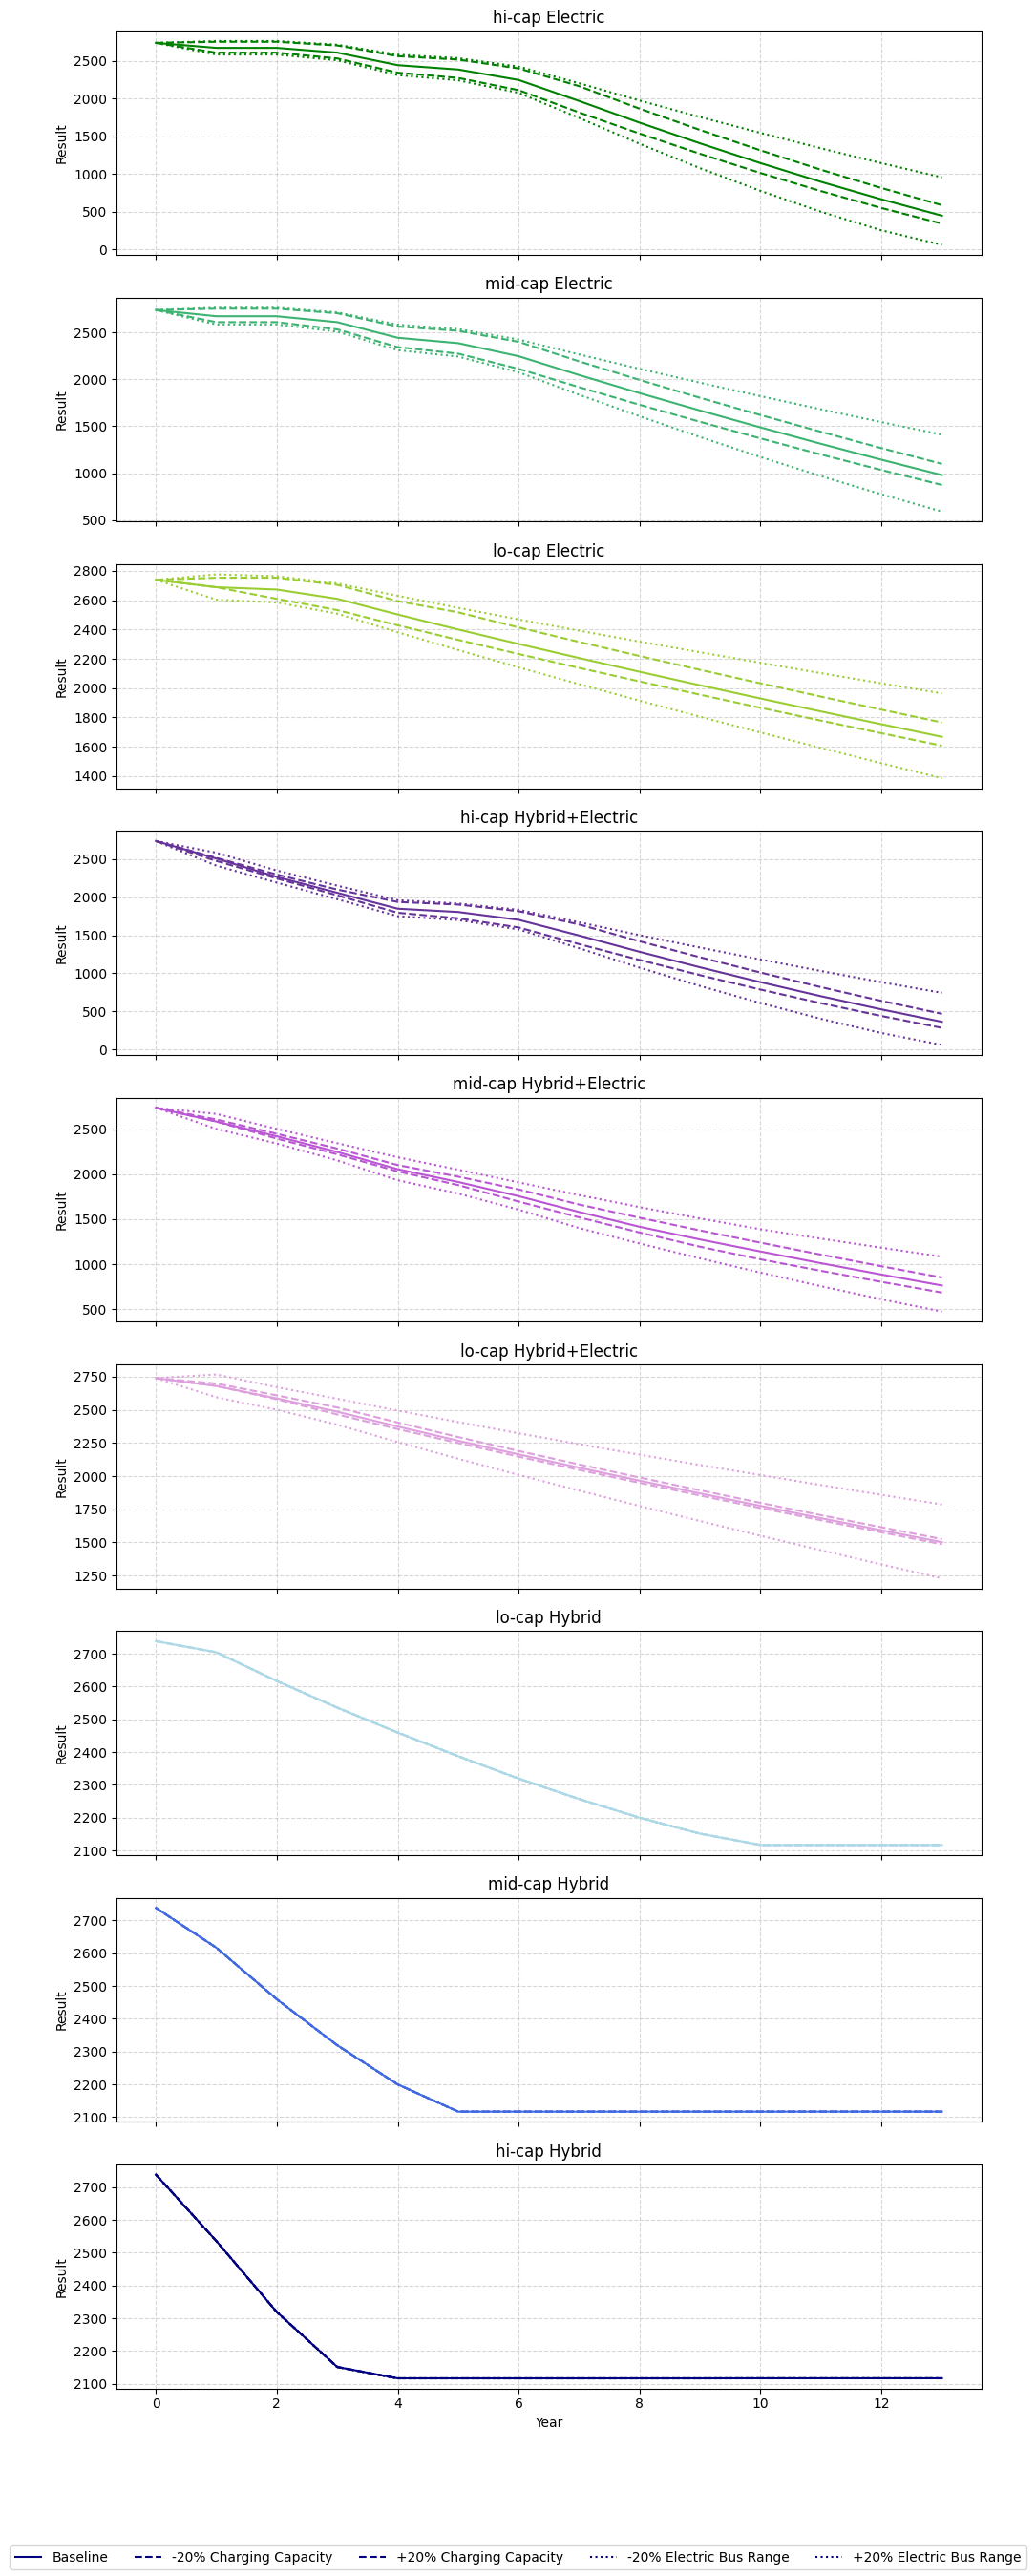

In [75]:

# Define the custom color palette
custom_palette = {
    "Status quo": "red",
    "lo-cap Hybrid": "lightblue",
    "mid-cap Hybrid": "royalblue",
    "hi-cap Hybrid": "navy",
    "lo-cap Hybrid+Electric": "plum",
    "mid-cap Hybrid+Electric": "mediumorchid",
    "hi-cap Hybrid+Electric": "rebeccapurple",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}

# Identify unique futures and sensitivity scenarios
unique_futures = final_df_modified["Future"].unique()
sensitivity_scenarios = [
    "Baseline", "-20% Charging Capacity", "+20% Charging Capacity", "-20% Electric Bus Range", "+20% Electric Bus Range"
]

# Create subplots
fig, axes = plt.subplots(nrows=len(unique_futures), ncols=1, figsize=(10, len(unique_futures) * 3), sharex=True)

# Ensure axes is iterable in case of a single subplot
if len(unique_futures) == 1:
    axes = [axes]

# Iterate over each future and create a subplot
for ax, future in zip(axes, unique_futures):
    future_data = final_df_modified[final_df_modified["Future"] == future]

    # Plot each sensitivity scenario
    for scenario in sensitivity_scenarios:
        scenario_data = future_data[future_data["Sensitivity-Scenario"] == scenario]
        linestyle = '-' if scenario == "Baseline" else '--' if "Charging" in scenario else ':'
        ax.plot(scenario_data["Year"], scenario_data["Result"], linestyle=linestyle, label=scenario,
                color=custom_palette.get(future, "black"))

    ax.set_title(future, fontsize=12)
    ax.set_ylabel("Result")
    ax.grid(True, linestyle="--", alpha=0.5)

# Set common x-axis label
axes[-1].set_xlabel("Year")

# Create a single legend at the bottom
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=len(sensitivity_scenarios), fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to fit legend
plt.show()


In [76]:
## Define the desired order for sorting the 'Future' column
#desired_order = [
#    "lo-cap Electric", "mid-cap Electric", "hi-cap Electric",
#    "lo-cap Hybrid+Electric", "mid-cap Hybrid+Electric", "hi-cap Hybrid+Electric"
#]

## Ensure the 'Future' column is categorical with the specified order
#final_df_modified["Future"] = pd.Categorical(final_df_modified["Future"], categories=desired_order, ordered=True)

## Sort the dataframe based on this order
#final_df_modified = final_df_modified.sort_values(by="Future")
#final_df_modified

In [77]:
final_df_modified.loc[(final_df_modified['Future'] == 'hi-cap Electric') & (final_df_modified['Year'] == 13)]

,Year,Result,Scenario,Strategy,Sensitivity-Scenario,Future
13,13,908.210066,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
27,13,585.994430,hi-cap,Electric,-20% Charging Capacity,hi-cap Electric
41,13,341.442292,hi-cap,Electric,+20% Charging Capacity,hi-cap Electric
55,13,213.368962,hi-cap,Electric,+50% Charging Capacity,hi-cap Electric
69,13,49.021229,hi-cap,Electric,+100% Charging Capacity,hi-cap Electric
83,13,2125.630240,hi-cap,Electric,-50% Electric Bus Range,hi-cap Electric
97,13,954.771244,hi-cap,Electric,-20% Electric Bus Range,hi-cap Electric
111,13,59.759361,hi-cap,Electric,+20% Electric Bus Range,hi-cap Electric
125,13,0.000000,hi-cap,Electric,+100% Electric Bus Range,hi-cap Electric
783,13,446.605208,hi-cap,Electric,Baseline,hi-cap Electric


In [78]:
final_df_modified['Sensitivity-Scenario'].unique()

array(['-50% Charging Capacity', '-20% Charging Capacity',
       '+20% Charging Capacity', '+50% Charging Capacity',
       '+100% Charging Capacity', '-50% Electric Bus Range',
       '-20% Electric Bus Range', '+20% Electric Bus Range',
       '+100% Electric Bus Range', 'Baseline'], dtype=object)

In [79]:
#import matplotlib.pyplot as plt
#import pandas as pd

## Define colors for futures
#future_colors = {
#    "lo-cap Hybrid": "lightblue",
#    "mid-cap Hybrid": "royalblue",
#    "hi-cap Hybrid": "navy",
#    "lo-cap Hybrid+Electric": "plum",
#    "mid-cap Hybrid+Electric": "mediumorchid",
#    "hi-cap Hybrid+Electric": "rebeccapurple",
#    "lo-cap Electric": "yellowgreen",
#    "mid-cap Electric": "mediumseagreen",
#    "hi-cap Electric": "green"
#}

## Define line styles for sensitivity scenarios
#linestyles = {
#    "Baseline": "-",
#    "-20% Charging Capacity": "--",
#    "+20% Charging Capacity": "--",
#    "-20% Electric Bus Range": ":",
#    "+20% Electric Bus Range": ":"
#}

## Identify unique futures
#unique_futures = final_df_modified["Future"].unique()

## Create two separate figures
#fig1, ax1 = plt.subplots(figsize=(10, 6), dpi=300)
#fig2, ax2 = plt.subplots(figsize=(10, 6), dpi=300)

## Iterate over each future and plot the sensitivity analysis for Charging Capacity
#for future in unique_futures:
#    future_data = final_df_modified[final_df_modified["Future"] == future]

#    # Extract data for different sensitivity scenarios
#    base_data = future_data[future_data["Sensitivity-Scenario"] == "Baseline"]
#    #print("base_data", base_data)
#    low_data = future_data[future_data["Sensitivity-Scenario"] == "-20% Charging Capacity"]
#    #print("low_data", low_data)
#    high_data = future_data[future_data["Sensitivity-Scenario"] == "+20% Charging Capacity"]
#    #print("high_data", high_data)


#    # Plot shaded region for Charging Capacity
#    ax1.fill_between(base_data["Year"], low_data["Result"], high_data["Result"],
#                     color=future_colors[future], alpha=0.2)

#    # Plot the Baseline
#    ax1.plot(base_data["Year"], base_data["Result"], linestyle=linestyles["Baseline"],
#             color=future_colors[future], label=f"{future}")

## Configure Charging Capacity plot
##ax1.set_title("Sensitivity Analysis: Charging Capacity", fontsize=16)
#ax1.set_ylabel("Diesel Consumption (gallons)", fontsize=18)
#ax1.set_xlabel("Year", fontsize=18)
#ax1.tick_params(axis='both', labelsize=16)  
#ax1.legend(loc="lower left", fontsize=16)
#ax1.grid(True, linestyle="--", alpha=0.5)

## Iterate over each future and plot the sensitivity analysis for Electric Bus Range
#for future in unique_futures:
#    future_data = final_df_modified[final_df_modified["Future"] == future]

#    # Extract data for different sensitivity scenarios
#    base_data = future_data[future_data["Sensitivity-Scenario"] == "Baseline"]
#    #print(base_data)
#    low_data = future_data[future_data["Sensitivity-Scenario"] == "-20% Electric Bus Range"]
#    #print(low_data)
#    high_data = future_data[future_data["Sensitivity-Scenario"] == "+20% Electric Bus Range"]
#    #print(high_data)

#    # Plot shaded region for Electric Bus Range
#    ax2.fill_between(base_data["Year"], low_data["Result"], high_data["Result"],
#                     color=future_colors[future], alpha=0.2)

#    # Plot the Baseline
#    ax2.plot(base_data["Year"], base_data["Result"], linestyle=linestyles["Baseline"],
#             color=future_colors[future], label=f"{future}")

## Configure Electric Bus Range plot
##ax2.set_title("Sensitivity Analysis: Electric Bus Range", fontsize=16)
#ax2.set_ylabel("Diesel Consumption (gallons)", fontsize=20)
#ax2.set_xlabel("Year", fontsize=20)
#ax2.tick_params(axis='both', labelsize=18)  
#ax2.legend(loc="lower left", fontsize=18)
#ax2.grid(True, linestyle="--", alpha=0.5)

## Adjust layout and display
#plt.tight_layout()
#plt.show()


In [80]:
#import matplotlib.pyplot as plt
#import pandas as pd

## Define colors for futures
#future_colors = {
#    "lo-cap Hybrid": "lightblue",
#    "mid-cap Hybrid": "royalblue",
#    "hi-cap Hybrid": "navy",
#    "lo-cap Hybrid+Electric": "plum",
#    "mid-cap Hybrid+Electric": "mediumorchid",
#    "hi-cap Hybrid+Electric": "rebeccapurple",
#    "lo-cap Electric": "yellowgreen",
#    "mid-cap Electric": "mediumseagreen",
#    "hi-cap Electric": "green"
#}

## Define line styles for sensitivity scenarios
#linestyles = {
#    "Baseline": "-",
#    "-20% Charging Capacity": "--",
#    "+20% Charging Capacity": "--",
#    "-20% Electric Bus Range": ":",
#    "+20% Electric Bus Range": ":"
#}

## Identify unique futures
#unique_futures = final_df_modified["Future"].unique()

## Create two separate figures
#fig1, ax1 = plt.subplots(figsize=(10, 6), dpi=300)
#fig2, ax2 = plt.subplots(figsize=(10, 6), dpi=300)

## Store legend handles and labels
#legend_handles = []
#legend_labels = []

## Iterate over each future and plot the sensitivity analysis for Charging Capacity
#for future in unique_futures:
#    future_data = final_df_modified[final_df_modified["Future"] == future]

#    # Extract data for different sensitivity scenarios
#    base_data = future_data[future_data["Sensitivity-Scenario"] == "Baseline"]
#    low_data = future_data[future_data["Sensitivity-Scenario"] == "-20% Charging Capacity"]
#    high_data = future_data[future_data["Sensitivity-Scenario"] == "+20% Charging Capacity"]

#    # Plot shaded region for Charging Capacity
#    ax1.fill_between(base_data["Year"], low_data["Result"], high_data["Result"],
#                     color=future_colors[future], alpha=0.2)

#    # Plot the Baseline
#    line, = ax1.plot(base_data["Year"], base_data["Result"], linestyle=linestyles["Baseline"],
#                     color=future_colors[future], label=f"{future}")
    
#    # Store handles for the separate legend
#    legend_handles.append(line)
#    legend_labels.append(future)

## Configure Charging Capacity plot
#ax1.set_ylabel("Diesel Consumption (gallons)", fontsize=18)
#ax1.set_xlabel("Year", fontsize=18)
#ax1.tick_params(axis='both', labelsize=16)  
#ax1.grid(True, linestyle="--", alpha=0.5)

## Iterate over each future and plot the sensitivity analysis for Electric Bus Range
#for future in unique_futures:
#    future_data = final_df_modified[final_df_modified["Future"] == future]

#    # Extract data for different sensitivity scenarios
#    base_data = future_data[future_data["Sensitivity-Scenario"] == "Baseline"]
#    low_data = future_data[future_data["Sensitivity-Scenario"] == "-20% Electric Bus Range"]
#    high_data = future_data[future_data["Sensitivity-Scenario"] == "+20% Electric Bus Range"]

#    # Plot shaded region for Electric Bus Range
#    ax2.fill_between(base_data["Year"], low_data["Result"], high_data["Result"],
#                     color=future_colors[future], alpha=0.2)

#    # Plot the Baseline
#    ax2.plot(base_data["Year"], base_data["Result"], linestyle=linestyles["Baseline"],
#             color=future_colors[future])

## Configure Electric Bus Range plot
#ax2.set_ylabel("Diesel Consumption (gallons)", fontsize=20)
#ax2.set_xlabel("Year", fontsize=20)
#ax2.tick_params(axis='both', labelsize=18)  
#ax2.grid(True, linestyle="--", alpha=0.5)

## Create separate legend figure
#fig_leg = plt.figure(figsize=(10, 2))
#ax_leg = fig_leg.add_subplot(111)
#ax_leg.axis("off")

## Add legend to the separate figure
#fig_leg.legend(legend_handles, legend_labels, loc="center", fontsize=16, ncol=3)

## Adjust layout and display
#plt.tight_layout()
#plt.show()


In [81]:
## Define the desired order
#desired_order = [
#    "hi-cap Electric",
#    "mid-cap Electric",
#    "lo-cap Electric",
#    "hi-cap Hybrid+Electric",
#    "mid-cap Hybrid+Electric",
#    "lo-cap Hybrid+Electric"
#]

## Create a mapping of labels to handles
#label_to_handle = {label: handle for label, handle in zip(legend_labels, legend_handles)}

## Reorder handles and labels, ensuring they exist in the original legend
#ordered_handles = [label_to_handle[label] for label in desired_order if label in label_to_handle]
#ordered_labels = [label for label in desired_order if label in label_to_handle]

## Create separate legend figure
#fig_leg = plt.figure(figsize=(25, 4), dpi=300)
#ax_leg = fig_leg.add_subplot(111)
#ax_leg.axis("off")

## Increase line width for legend handles
#thicker_handles = [plt.Line2D([], [], color=line.get_color(), linestyle=line.get_linestyle(), linewidth=10) 
#                   for line in ordered_handles]

## Add legend to the separate figure
#fig_leg.legend(thicker_handles, ordered_labels, loc="center", fontsize=40, ncol=6)

## Adjust layout and display
#plt.tight_layout()
#plt.show()


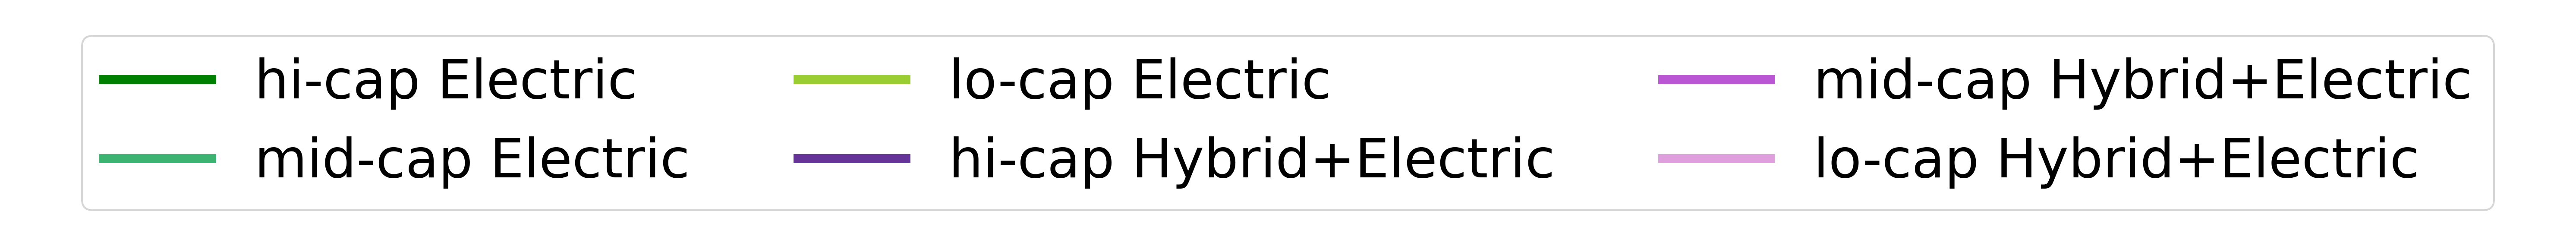

In [82]:
# Define the correct order
desired_order = [
    "hi-cap Electric",
    "mid-cap Electric",
    "lo-cap Electric",
    "hi-cap Hybrid+Electric",
    "mid-cap Hybrid+Electric",
    "lo-cap Hybrid+Electric"
]

# Define colors and linestyles to match the original plots
future_colors = {
    "hi-cap Electric": "green",
    "mid-cap Electric": "mediumseagreen",
    "lo-cap Electric": "yellowgreen",
    "hi-cap Hybrid+Electric": "rebeccapurple",
    "mid-cap Hybrid+Electric": "mediumorchid",
    "lo-cap Hybrid+Electric": "plum"
}

linestyle = "-"  # Assuming all are solid lines

# Create separate legend figure
fig_leg = plt.figure(figsize=(20, 2), dpi=300)
ax_leg = fig_leg.add_subplot(111)
ax_leg.axis("off")

# Manually create handles in the correct order
thicker_handles = [
    plt.Line2D([], [], color=future_colors[label], linestyle=linestyle, linewidth=5)
    for label in desired_order
]

# Add legend in the correct order
fig_leg.legend(thicker_handles, desired_order, loc="center", fontsize=30, ncol=3)

# Adjust layout and display
plt.tight_layout()
plt.show()


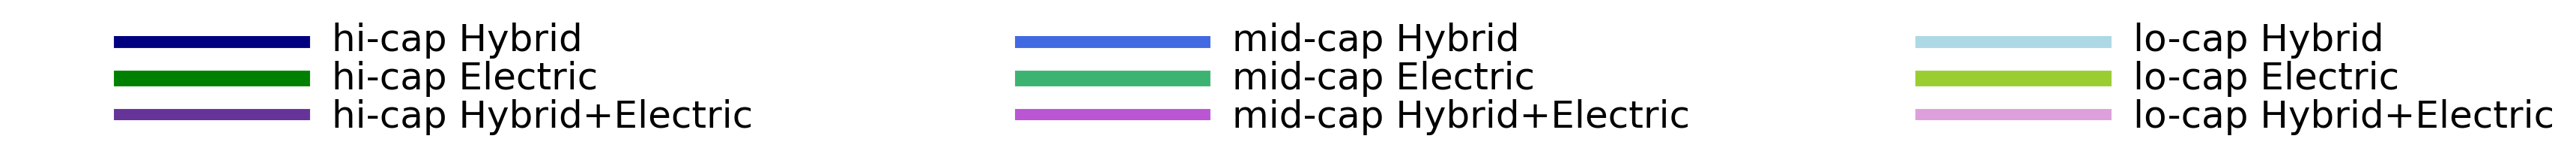

In [83]:
# Define the correct order
desired_order = [
    "hi-cap Hybrid", "mid-cap Hybrid", "lo-cap Hybrid",
    "hi-cap Electric", "mid-cap Electric", "lo-cap Electric",
    "hi-cap Hybrid+Electric", "mid-cap Hybrid+Electric", "lo-cap Hybrid+Electric"
]

# Define colors manually
future_colors = {
    "lo-cap Hybrid": "lightblue",
    "mid-cap Hybrid": "royalblue",
    "hi-cap Hybrid": "navy",
    "hi-cap Electric": "green",
    "mid-cap Electric": "mediumseagreen",
    "lo-cap Electric": "yellowgreen",
    "hi-cap Hybrid+Electric": "rebeccapurple",
    "mid-cap Hybrid+Electric": "mediumorchid",
    "lo-cap Hybrid+Electric": "plum"
}

linestyle = "-"  # Assuming all are solid lines

# ✅ Step 1: Create a blank figure for the legend
fig_leg, ax_leg = plt.subplots(figsize=(10, 0.7), dpi=300)
ax_leg.axis("off")

# ✅ Step 2: Define layout parameters
columns = 3  # Number of columns (adjust as needed)
rows = -(-len(desired_order) // columns)  # Compute number of rows using ceiling division

x_start = 0.05  # Initial X position
#y_positions = [0.7- i * 0.2 for i in range(rows)]  # Generate enough Y positions dynamically
y_positions = [0.5, 0.3, 0.1]  # Generate enough Y positions dynamically

spacing = 0.3  # Spacing between columns

# ✅ Step 3: Manually place legend items
for i, label in enumerate(desired_order):
    row = i // columns  # Determine row index
    col = i % columns  # Determine column index

    # Compute X and Y positions for this label
    x_pos = x_start + col * spacing
    y_pos = y_positions[row]  # No longer out of range

    # Plot the manual legend line
    ax_leg.plot([x_pos, x_pos + 0.06], [y_pos, y_pos], 
                color=future_colors[label], linestyle=linestyle, linewidth=5)

    # Add corresponding text label
    ax_leg.text(x_pos + 0.07, y_pos, label, fontsize=12, va='center', ha='left')

# ✅ Step 4: Show the manually created legend
plt.tight_layout()
plt.show()


In [84]:
final_df_modified

,Year,Result,Scenario,Strategy,Sensitivity-Scenario,Future
0,0,2738.750000,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
1,1,2853.864608,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
2,2,2853.864608,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
3,3,2819.690251,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
4,4,2736.833792,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
...,...,...,...,...,...,...
1241,9,2116.767773,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid
1242,10,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid
1243,11,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid
1244,12,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid


In [85]:
df = final_df_modified.copy()

# Separate baseline values for each year and future scenario
baseline_df = df[df["Sensitivity-Scenario"] == "Baseline"].copy()

# Merge to calculate percentage change
df = df.merge(
    baseline_df[["Year", "Future", "Result"]],
    on=["Year", "Future"],
    suffixes=("", "_Baseline")
)

# Compute percentage change from the baseline
df["Percent Change"] = ((df["Result"] - df["Result_Baseline"]) / df["Result_Baseline"]) * 100

# Compute the average impact of each sensitivity scenario across all years
summary_df = df.groupby(["Sensitivity-Scenario", "Future"])["Percent Change"].mean().reset_index()

summary_df


,Sensitivity-Scenario,Future,Percent Change
0,+100% Charging Capacity,hi-cap Electric,-34.991495
1,+100% Charging Capacity,hi-cap Hybrid,0.000000
2,+100% Charging Capacity,hi-cap Hybrid+Electric,-31.531226
3,+100% Charging Capacity,lo-cap Electric,-4.719831
4,+100% Charging Capacity,lo-cap Hybrid,0.000000
...,...,...,...
84,Baseline,lo-cap Hybrid,0.000000
85,Baseline,lo-cap Hybrid+Electric,0.000000
86,Baseline,mid-cap Electric,0.000000
87,Baseline,mid-cap Hybrid,0.000000


In [86]:
final_df_modified

,Year,Result,Scenario,Strategy,Sensitivity-Scenario,Future
0,0,2738.750000,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
1,1,2853.864608,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
2,2,2853.864608,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
3,3,2819.690251,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
4,4,2736.833792,hi-cap,Electric,-50% Charging Capacity,hi-cap Electric
...,...,...,...,...,...,...
1241,9,2116.767773,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid
1242,10,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid
1243,11,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid
1244,12,2116.837171,hi-cap,Hybrid,+100% Electric Bus Range,hi-cap Hybrid


In [87]:
# Corrected grouping syntax
aggregated_df = final_df_modified.groupby(["Sensitivity-Scenario", "Future"], as_index=False)["Result"].sum()

aggregated_df

,Sensitivity-Scenario,Future,Result
0,+100% Charging Capacity,hi-cap Electric,19456.577788
1,+100% Charging Capacity,hi-cap Hybrid,30913.238472
2,+100% Charging Capacity,hi-cap Hybrid+Electric,17021.068786
3,+100% Charging Capacity,lo-cap Electric,30034.732495
4,+100% Charging Capacity,lo-cap Hybrid,32838.833367
...,...,...,...
84,Baseline,lo-cap Hybrid,32838.833367
85,Baseline,lo-cap Hybrid+Electric,29742.789519
86,Baseline,mid-cap Electric,28261.894445
87,Baseline,mid-cap Hybrid,31386.063084


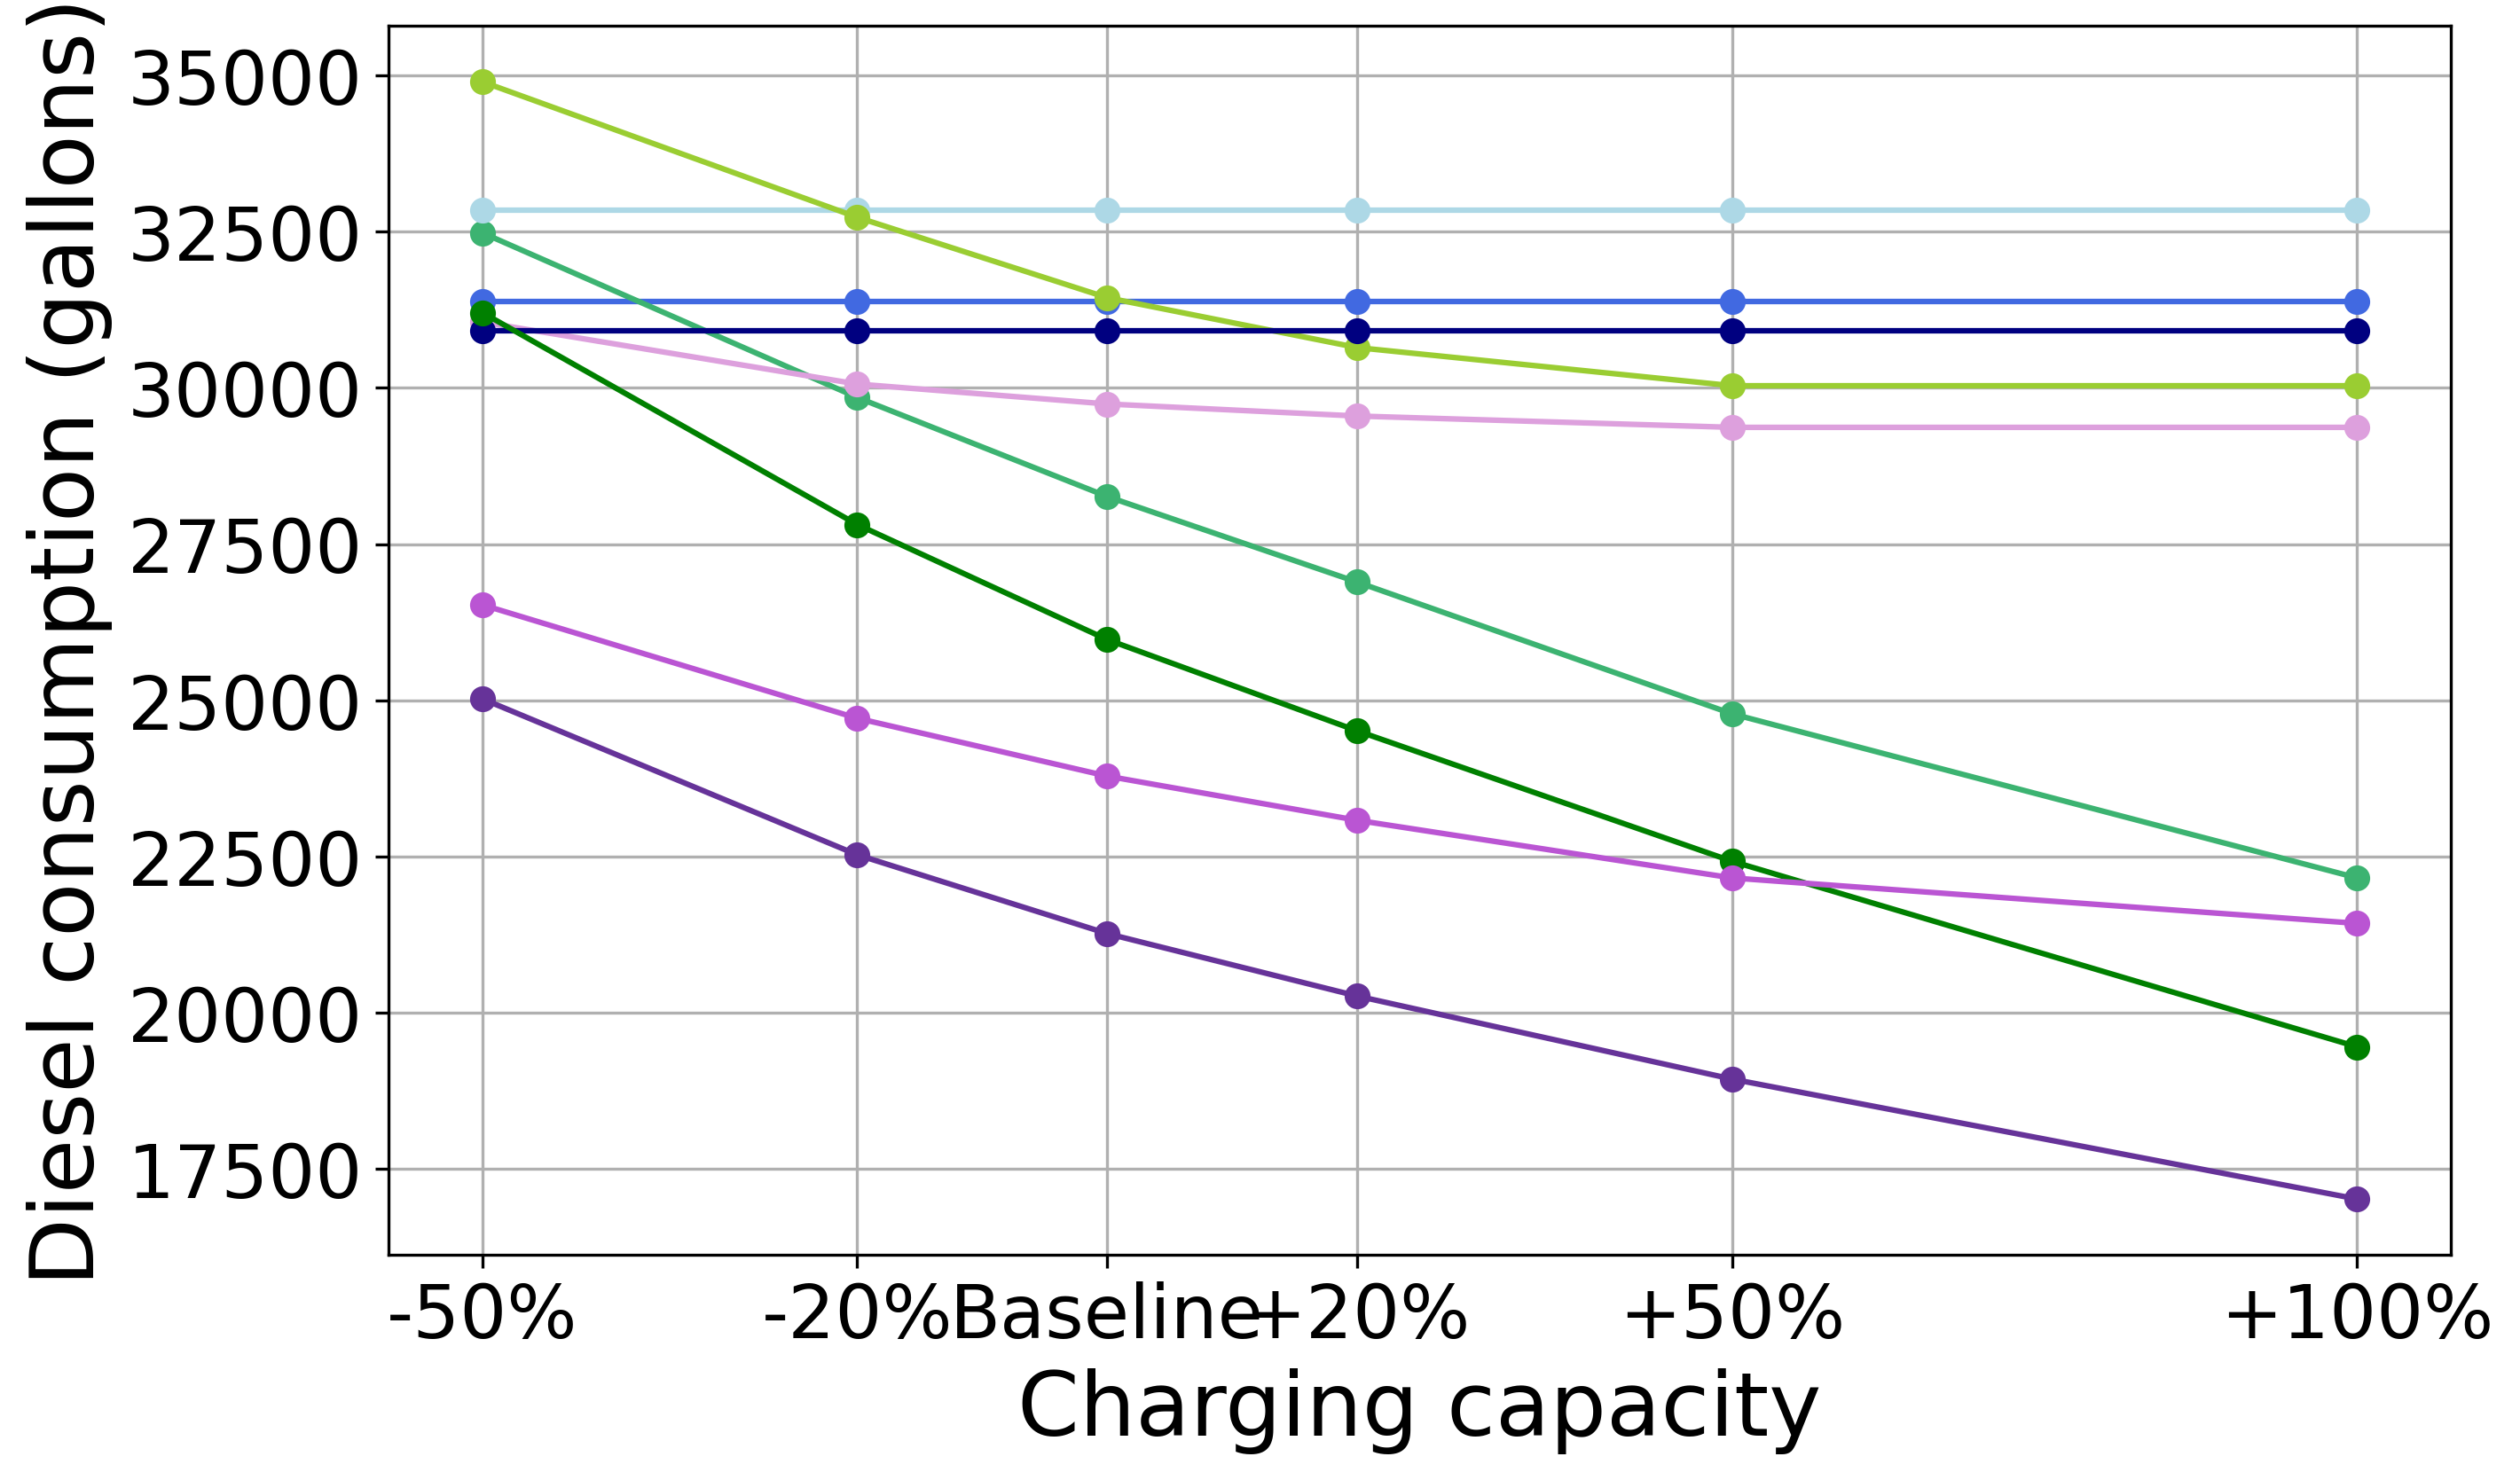

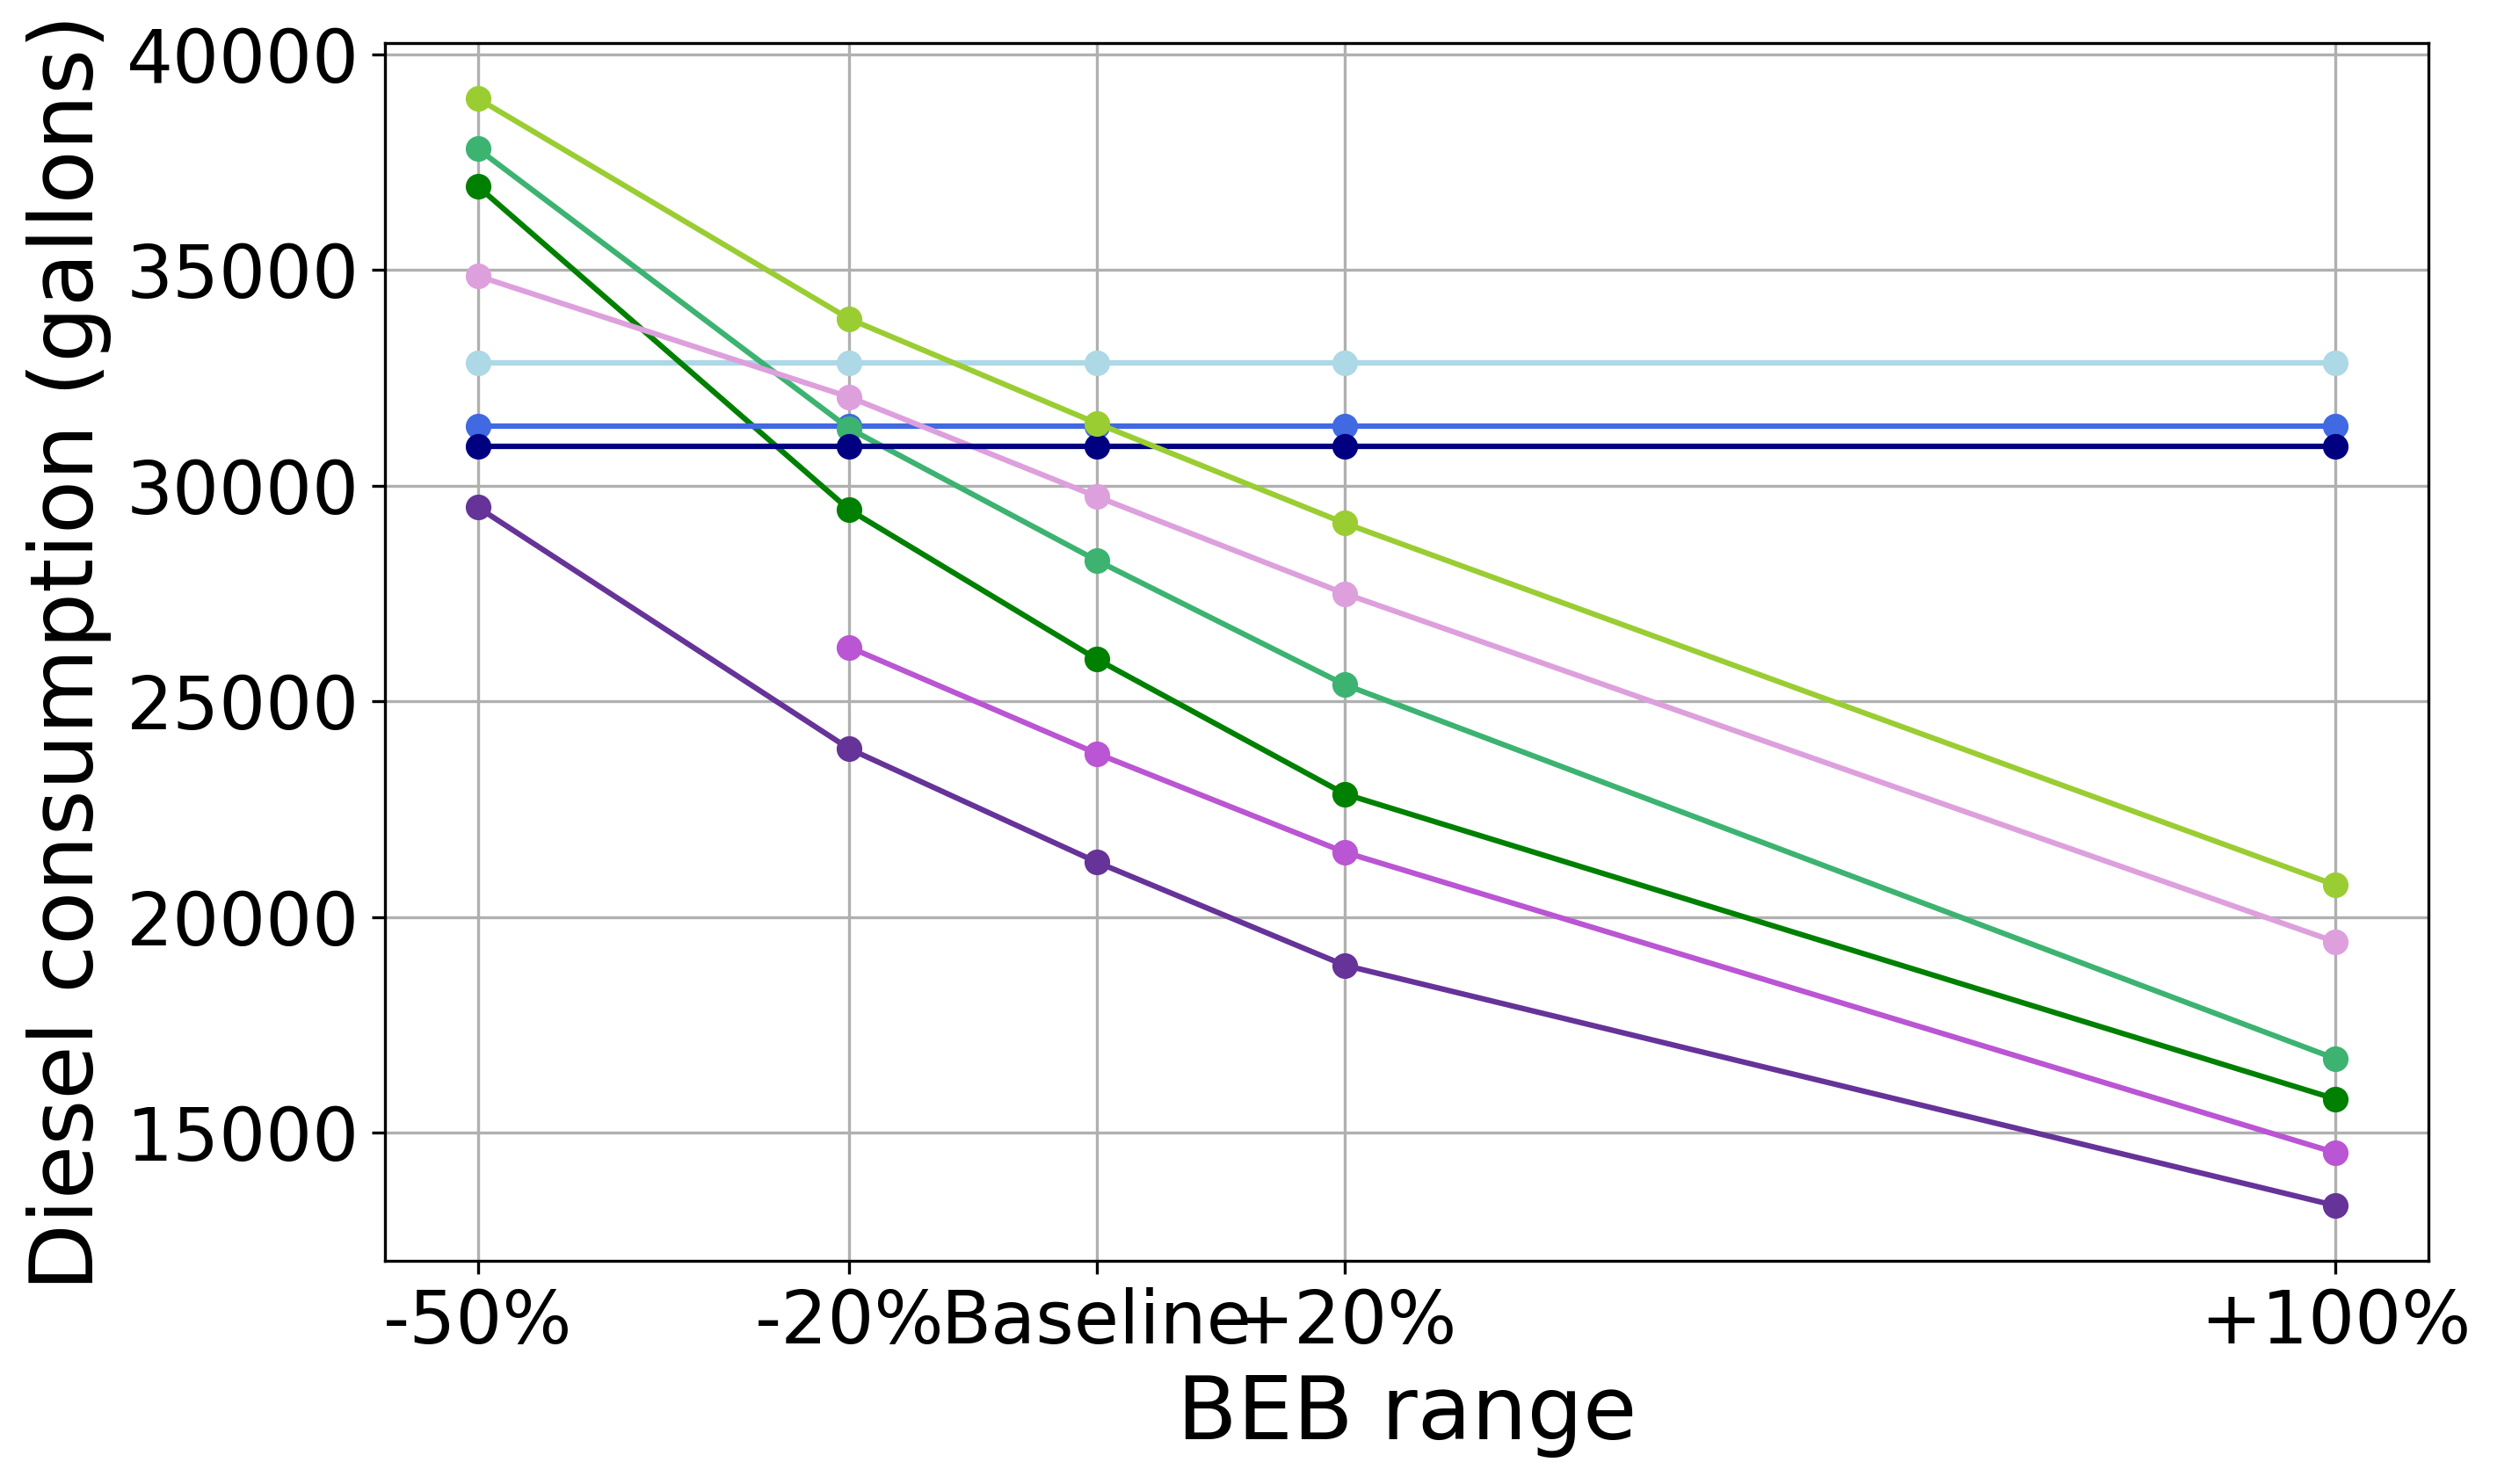

In [88]:
# Define color mapping for different futures
future_colors = {
    "Status quo": "red",
    "lo-cap Hybrid": "lightblue",
    "mid-cap Hybrid": "royalblue",
    "hi-cap Hybrid": "navy",
    "lo-cap Hybrid+Electric": "plum",
    "mid-cap Hybrid+Electric": "mediumorchid",
    "hi-cap Hybrid+Electric": "rebeccapurple",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}

# Separate Charging Capacity and Electric Bus Range data correctly
charging_capacity_df = aggregated_df[aggregated_df["Sensitivity-Scenario"].str.contains("Charging Capacity|Baseline")].copy()
electric_bus_range_df = aggregated_df[aggregated_df["Sensitivity-Scenario"].str.contains("Electric Bus Range|Baseline")].copy()

# Define correct scenario mapping separately for each variation
charging_capacity_scenario_mapping = {
    "-50% Charging Capacity": -50,
    "-20% Charging Capacity": -20,
    "Baseline": 0,
    "+20% Charging Capacity": 20,
    "+50% Charging Capacity": 50,
    "+100% Charging Capacity": 100
}

electric_bus_range_scenario_mapping = {
    "-50% Electric Bus Range": -50,
    "-20% Electric Bus Range": -20,
    "Baseline": 0,
    "+20% Electric Bus Range": 20,
    "+100% Electric Bus Range": 100
}

# Define sorting order separately for each variation
charging_capacity_df["Scenario_Order"] = charging_capacity_df["Sensitivity-Scenario"].apply(lambda x: list(charging_capacity_scenario_mapping.keys()).index(x))
electric_bus_range_df["Scenario_Order"] = electric_bus_range_df["Sensitivity-Scenario"].apply(lambda x: list(electric_bus_range_scenario_mapping.keys()).index(x))

# Sort the data based on correct order
charging_capacity_df = charging_capacity_df.sort_values(by="Scenario_Order")
electric_bus_range_df = electric_bus_range_df.sort_values(by="Scenario_Order")

# Plot for Charging Capacity Variation
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for future in charging_capacity_df["Future"].unique():
    subset = charging_capacity_df[charging_capacity_df["Future"] == future].sort_values(by="Scenario_Order")
    x_values = [charging_capacity_scenario_mapping[sc] for sc in subset["Sensitivity-Scenario"]]
    y_values = subset["Result"]
    ax.plot(x_values, y_values, marker='o', linestyle='-', color=future_colors.get(future, "black"))

ax.set_xticks([-50, -20, 0, 20, 50, 100])
ax.set_xticklabels(["-50%","-20%", "Baseline", "+20%", "+50%", "+100%"], fontsize=20)
ax.set_xlabel("Charging capacity", fontsize=24)
ax.set_ylabel("Diesel consumption (gallons)", fontsize=24)
#ax.set_title("Impact of Charging Capacity Variation")
ax.tick_params(axis='both', labelsize=20)  

ax.grid(True)
plt.show()

# Plot for Electric Bus Range Variation
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for future in electric_bus_range_df["Future"].unique():
    subset = electric_bus_range_df[electric_bus_range_df["Future"] == future].sort_values(by="Scenario_Order")
    x_values = [electric_bus_range_scenario_mapping[sc] for sc in subset["Sensitivity-Scenario"]]
    y_values = subset["Result"]
    ax.plot(x_values, y_values, marker='o', linestyle='-', color=future_colors.get(future, "black"))

ax.set_xticks([-50, -20, 0, 20, 100])
ax.set_xticklabels(["-50%", "-20%", "Baseline", "+20%", "+100%"], fontsize=20)
ax.set_xlabel("BEB range", fontsize=24)
ax.set_ylabel("Diesel consumption (gallons)", fontsize=24)
ax.tick_params(axis='both', labelsize=20)  
#ax.set_title("Impact of Electric Bus Range Variation")
ax.grid(True)
plt.show()


In [89]:
charging_capacity_df

,Sensitivity-Scenario,Future,Result,Scenario_Order
70,-50% Charging Capacity,mid-cap Hybrid,31386.063084,0
69,-50% Charging Capacity,mid-cap Electric,32481.548069,0
68,-50% Charging Capacity,lo-cap Hybrid+Electric,31053.300617,0
67,-50% Charging Capacity,lo-cap Hybrid,32838.833367,0
66,-50% Charging Capacity,lo-cap Electric,34898.848065,0
65,-50% Charging Capacity,hi-cap Hybrid+Electric,25024.511214,0
64,-50% Charging Capacity,hi-cap Hybrid,30913.238472,0
63,-50% Charging Capacity,hi-cap Electric,31204.677008,0
71,-50% Charging Capacity,mid-cap Hybrid+Electric,26529.006870,0
53,-20% Charging Capacity,mid-cap Hybrid+Electric,24713.799678,1


In [90]:
aggregated_df['Result']

0     19456.577788
1     30913.238472
2     17021.068786
3     30034.732495
4     32838.833367
          ...     
84    32838.833367
85    29742.789519
86    28261.894445
87    31386.063084
88    23788.111480
Name: Result, Length: 89, dtype: float64

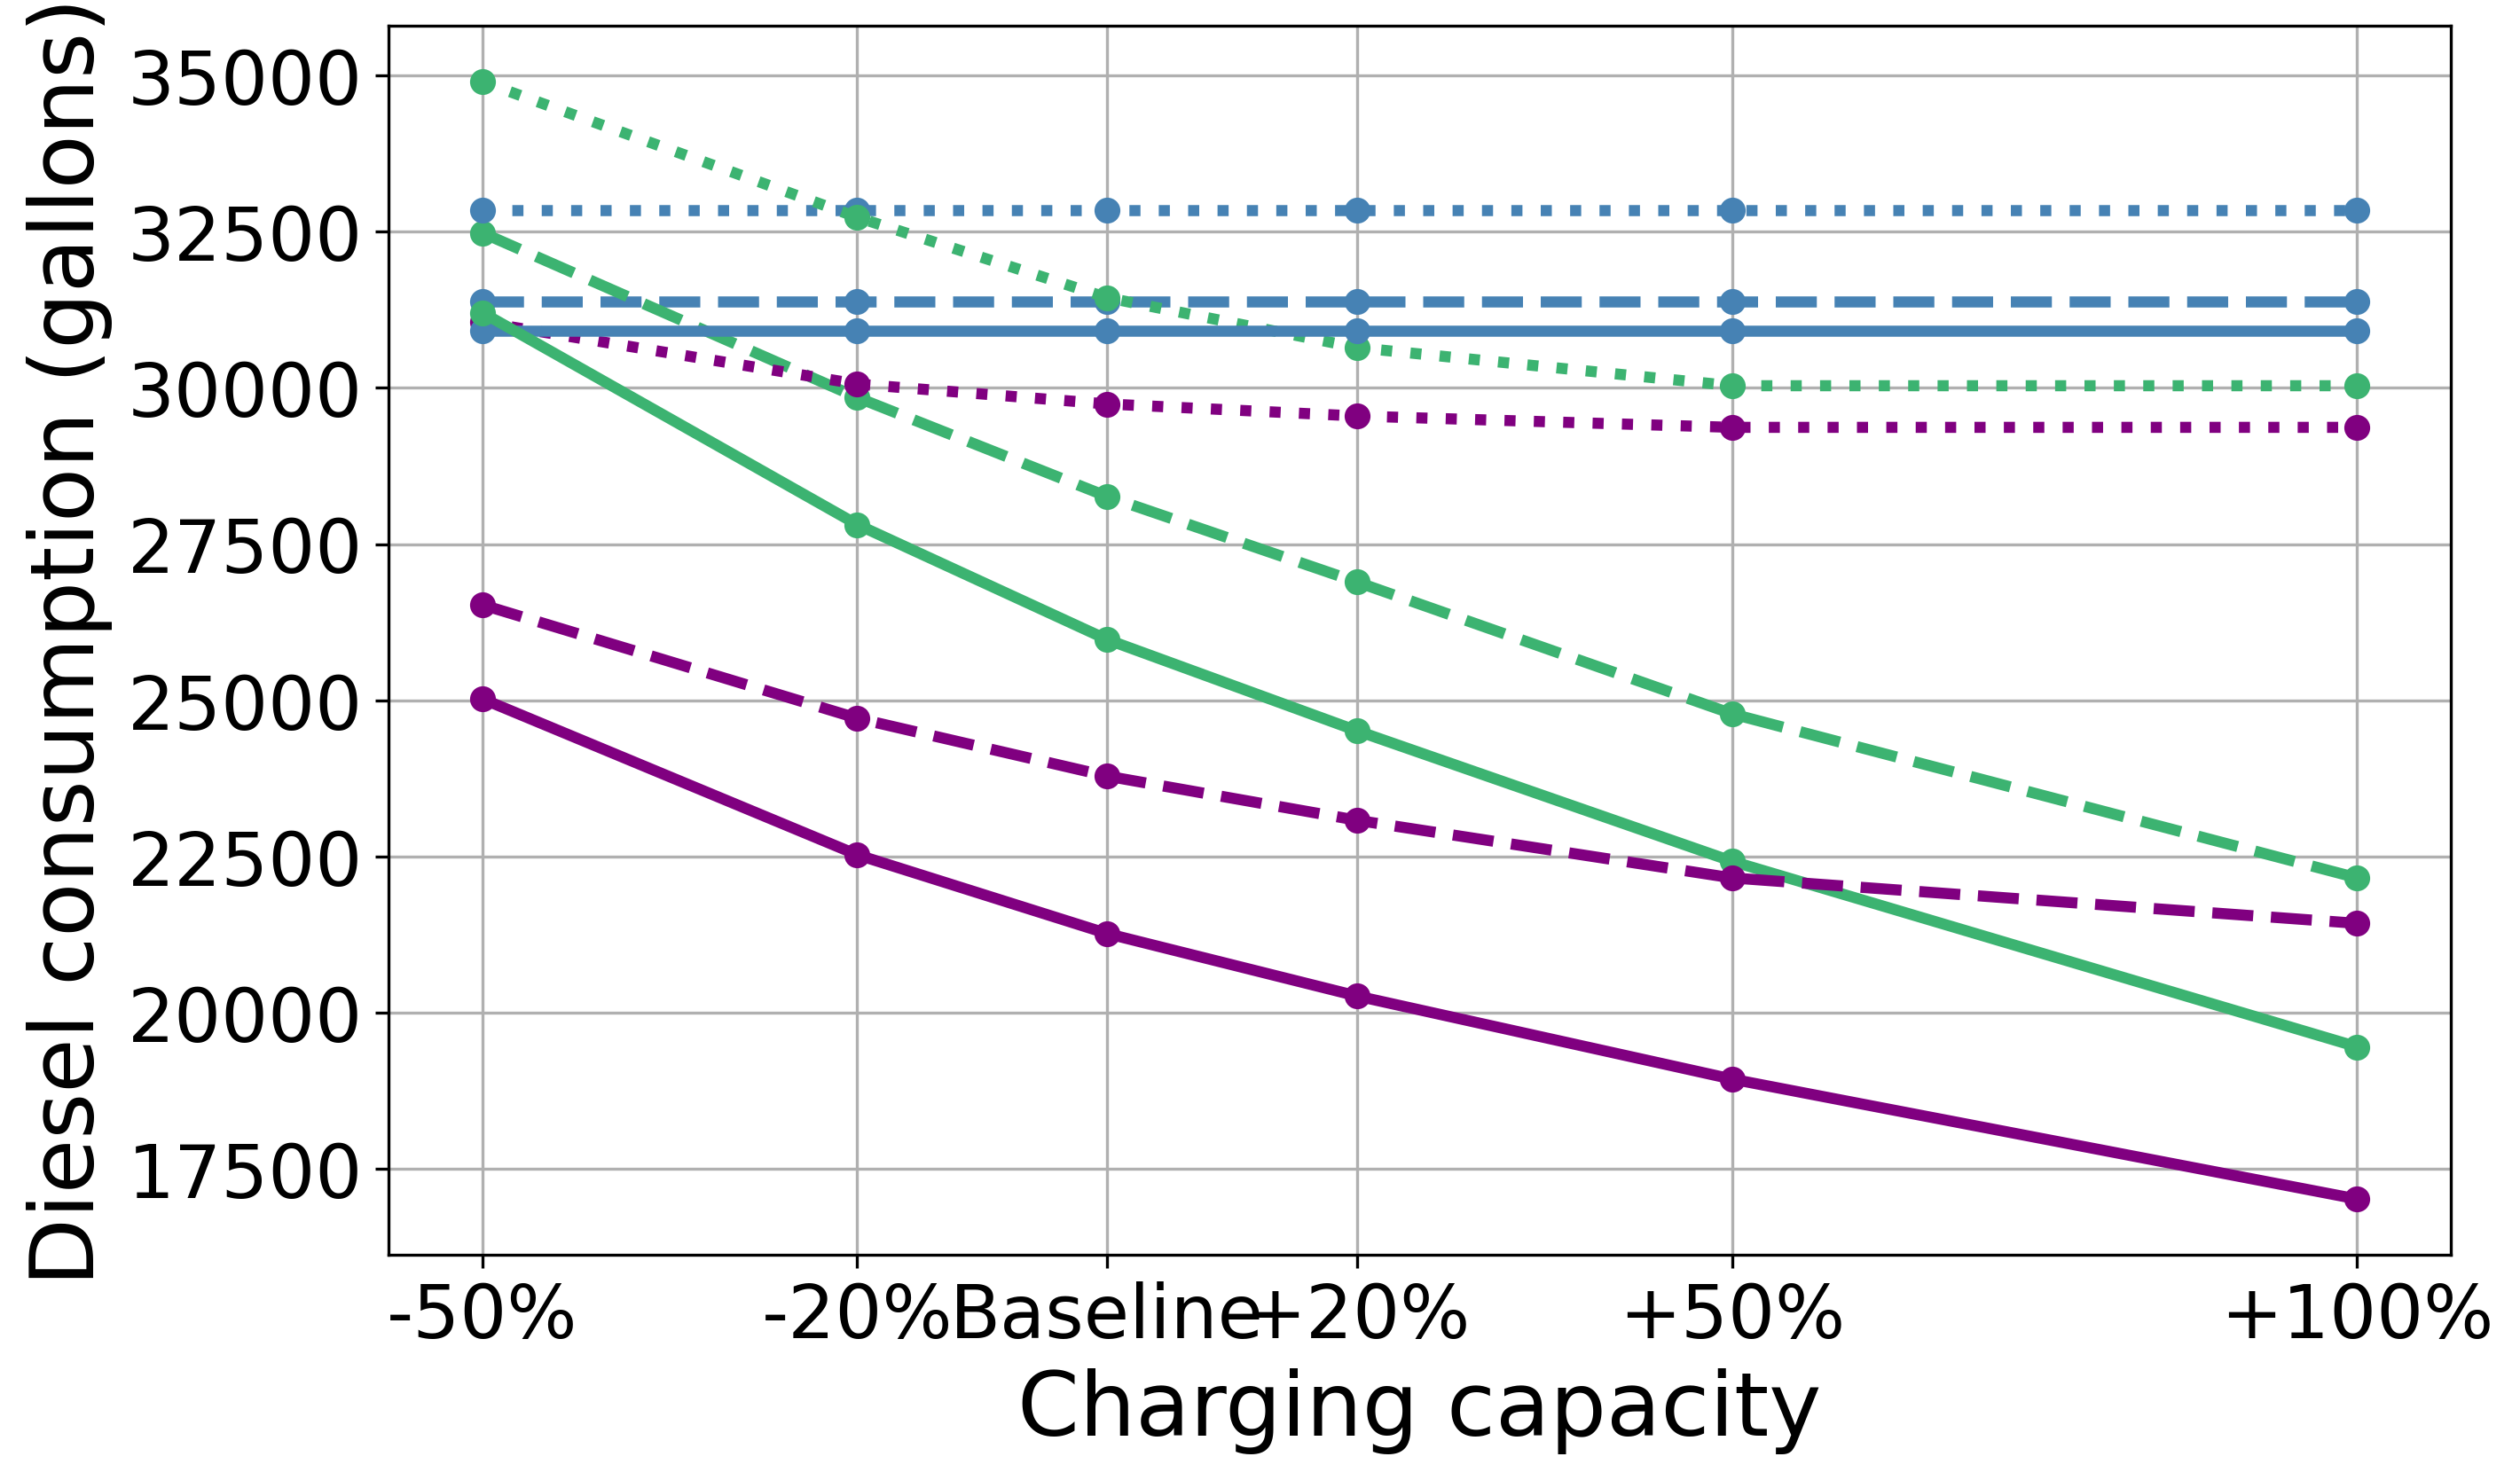

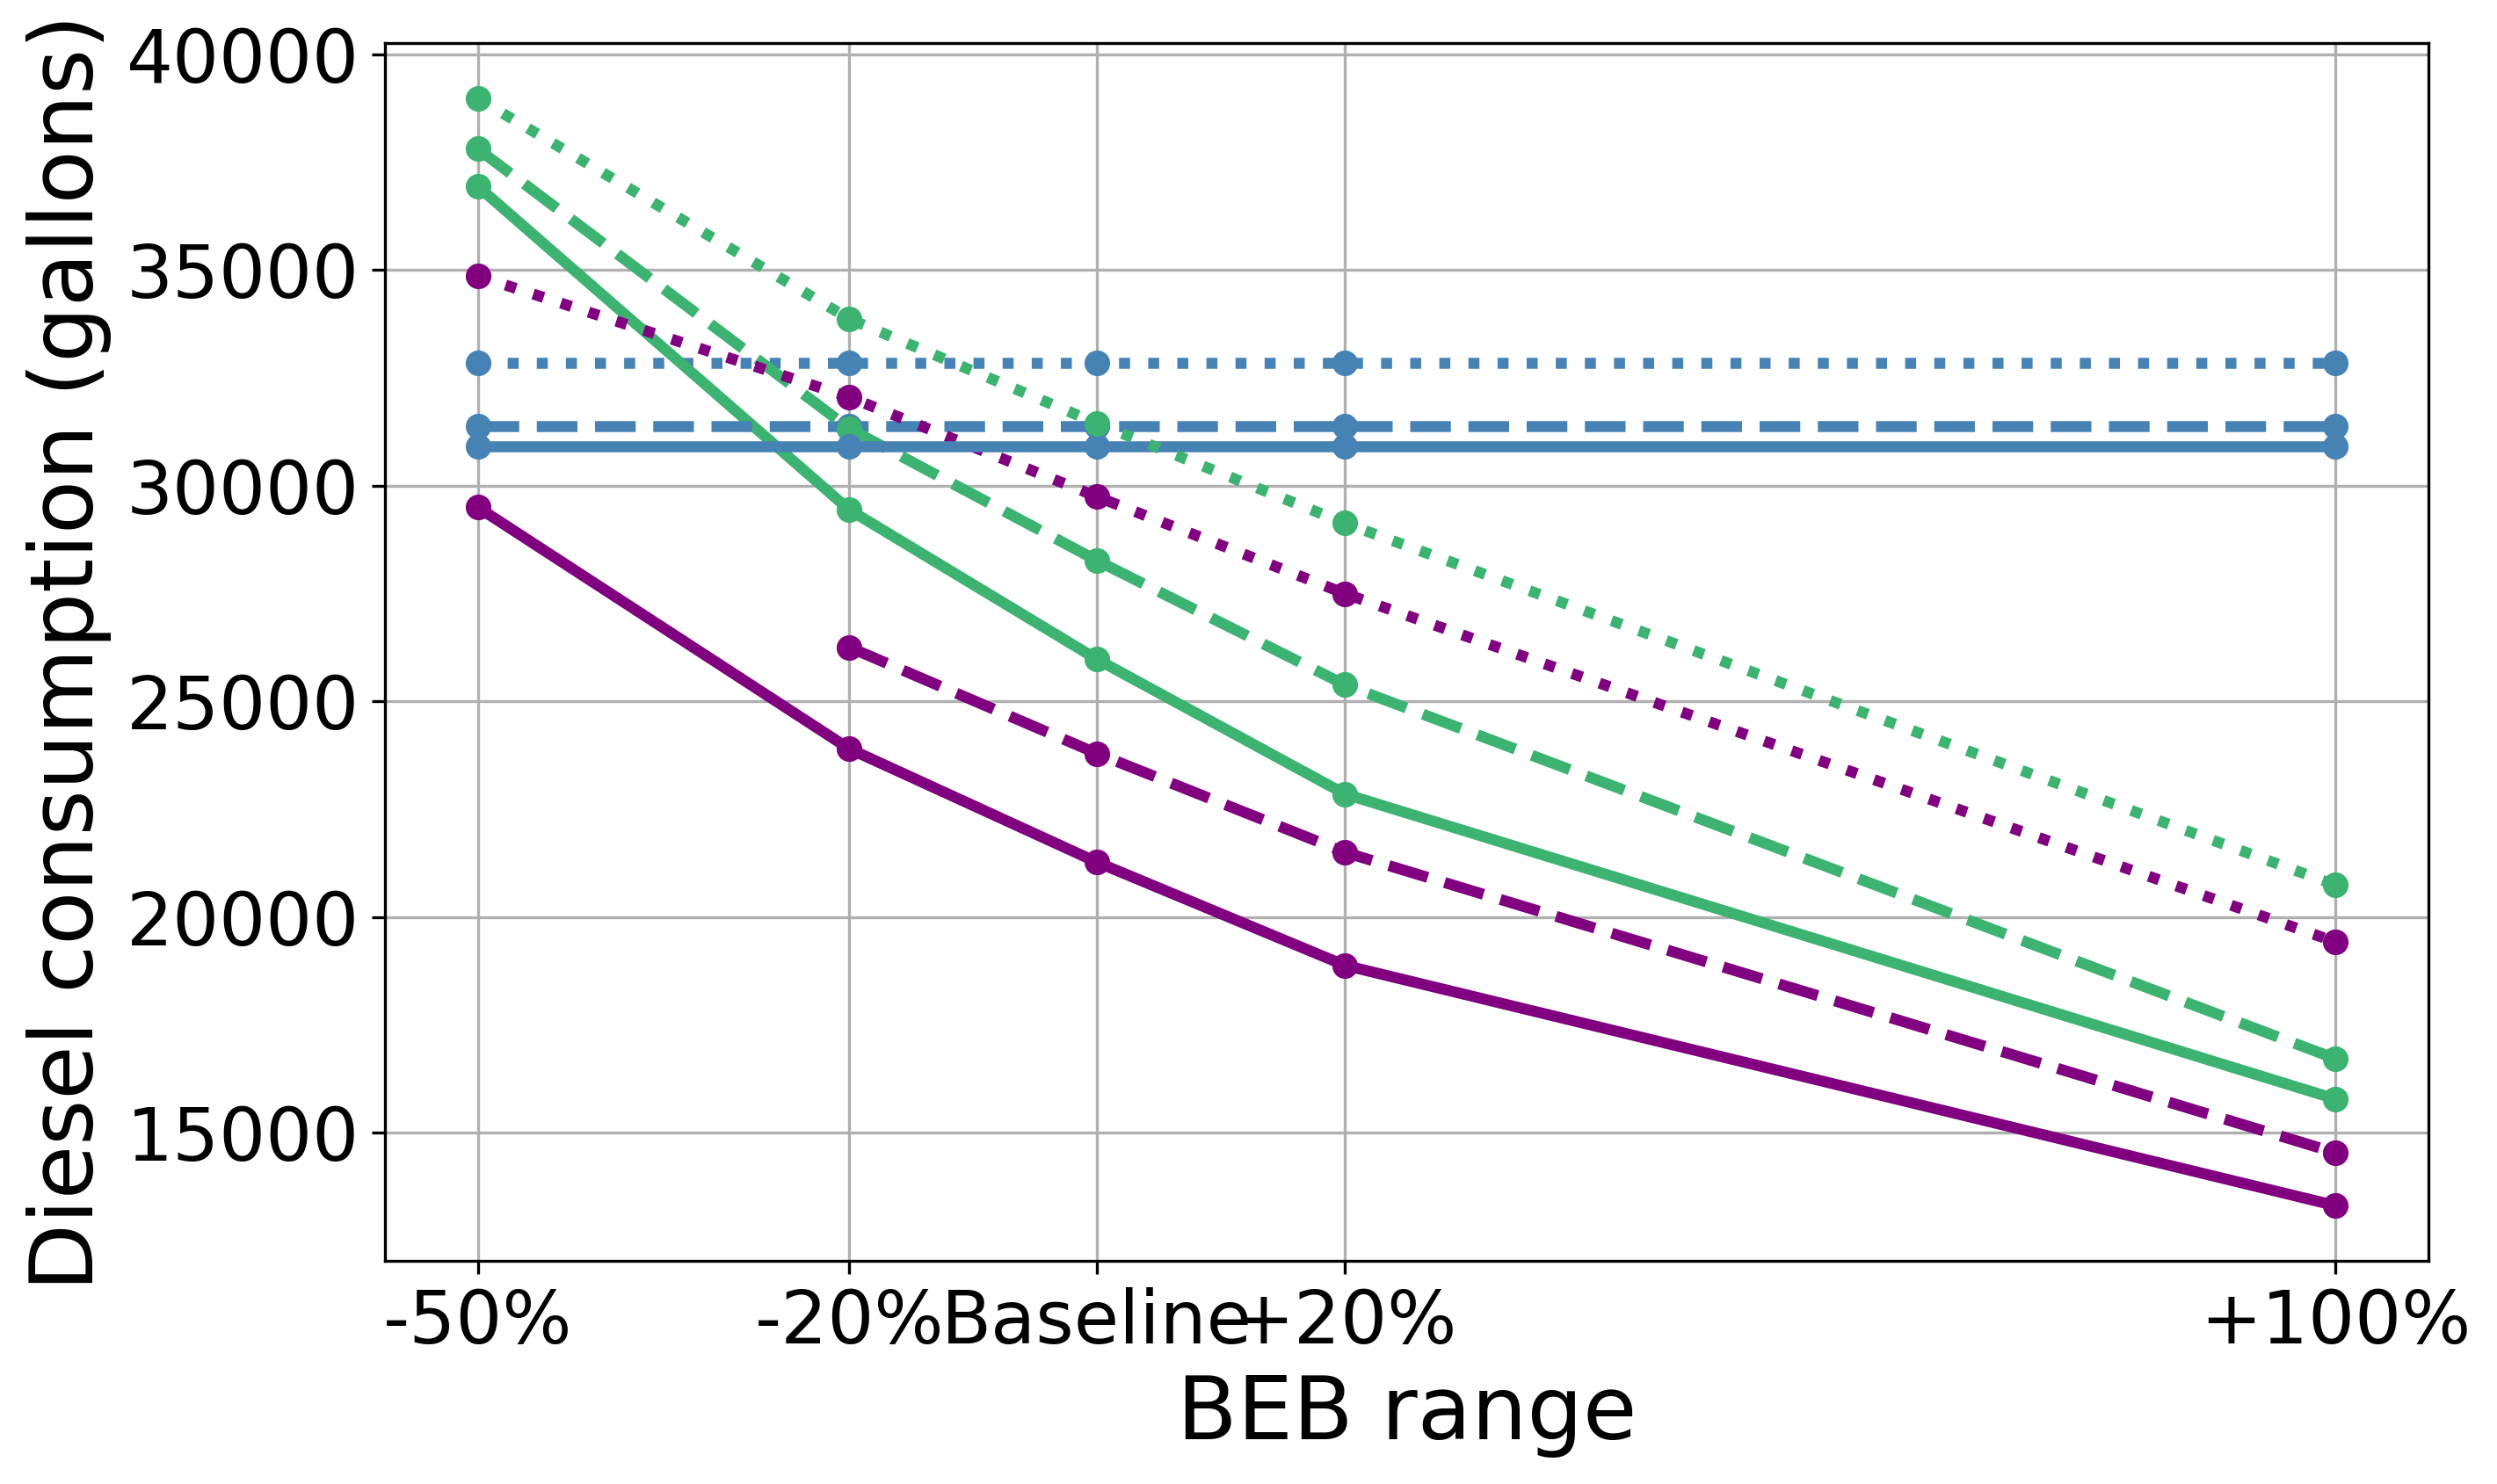

In [99]:
import matplotlib.pyplot as plt

# Define color mapping and line styles
custom_palette = {
    'Status quo': 'red',
    'lo-cap Hybrid': 'steelblue',
    'mid-cap Hybrid': 'steelblue',
    'hi-cap Hybrid': 'steelblue',
    'lo-cap Hybrid+Electric': 'purple',
    'mid-cap Hybrid+Electric': 'purple',
    'hi-cap Hybrid+Electric': 'purple',
    'lo-cap Electric': 'mediumseagreen',
    'mid-cap Electric': 'mediumseagreen',
    'hi-cap Electric': 'mediumseagreen'
}

custom_linestyles = {
    'Status quo': 'dotted',
    'lo-cap Hybrid': 'dotted',
    'lo-cap Hybrid+Electric': 'dotted',
    'lo-cap Electric': 'dotted',
    'mid-cap Hybrid': 'dashed',
    'mid-cap Hybrid+Electric': 'dashed',
    'mid-cap Electric': 'dashed',
    'hi-cap Hybrid': 'solid',
    'hi-cap Hybrid+Electric': 'solid',
    'hi-cap Electric': 'solid',
}

# Separate Charging Capacity and Electric Bus Range data
charging_capacity_df = aggregated_df[aggregated_df["Sensitivity-Scenario"].str.contains("Charging Capacity|Baseline")].copy()
electric_bus_range_df = aggregated_df[aggregated_df["Sensitivity-Scenario"].str.contains("Electric Bus Range|Baseline")].copy()

# Define scenario mappings
charging_capacity_scenario_mapping = {
    "-50% Charging Capacity": -50,
    "-20% Charging Capacity": -20,
    "Baseline": 0,
    "+20% Charging Capacity": 20,
    "+50% Charging Capacity": 50,
    "+100% Charging Capacity": 100
}

electric_bus_range_scenario_mapping = {
    "-50% Electric Bus Range": -50,
    "-20% Electric Bus Range": -20,
    "Baseline": 0,
    "+20% Electric Bus Range": 20,
    "+100% Electric Bus Range": 100
}

# Sort data based on correct order
charging_capacity_df["Scenario_Order"] = charging_capacity_df["Sensitivity-Scenario"].apply(lambda x: list(charging_capacity_scenario_mapping.keys()).index(x))
electric_bus_range_df["Scenario_Order"] = electric_bus_range_df["Sensitivity-Scenario"].apply(lambda x: list(electric_bus_range_scenario_mapping.keys()).index(x))

charging_capacity_df = charging_capacity_df.sort_values(by="Scenario_Order")
electric_bus_range_df = electric_bus_range_df.sort_values(by="Scenario_Order")

# Plot for Charging Capacity Variation
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for future in charging_capacity_df["Future"].unique():
    subset = charging_capacity_df[charging_capacity_df["Future"] == future].sort_values(by="Scenario_Order")
    x_values = [charging_capacity_scenario_mapping[sc] for sc in subset["Sensitivity-Scenario"]]
    y_values = subset["Result"]
    ax.plot(
        x_values, y_values, marker='o', 
        linestyle=custom_linestyles.get(future, 'solid'), 
        color=custom_palette.get(future, "black"),
        linewidth = 3
    )

ax.set_xticks([-50, -20, 0, 20, 50, 100])
ax.set_xticklabels(["-50%","-20%", "Baseline", "+20%", "+50%", "+100%"], fontsize=20)
ax.set_xlabel("Charging capacity", fontsize=24)
ax.set_ylabel("Diesel consumption (gallons)", fontsize=24)
ax.tick_params(axis='both', labelsize=20)  
ax.grid(True)

plt.show()

# Plot for Electric Bus Range Variation
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for future in electric_bus_range_df["Future"].unique():
    subset = electric_bus_range_df[electric_bus_range_df["Future"] == future].sort_values(by="Scenario_Order")
    x_values = [electric_bus_range_scenario_mapping[sc] for sc in subset["Sensitivity-Scenario"]]
    y_values = subset["Result"]
    ax.plot(
        x_values, y_values, marker='o', 
        linestyle=custom_linestyles.get(future, 'solid'), 
        color=custom_palette.get(future, "black"),
        linewidth = 3
    )

ax.set_xticks([-50, -20, 0, 20, 100])
ax.set_xticklabels(["-50%", "-20%", "Baseline", "+20%", "+100%"], fontsize=20)
ax.set_xlabel("BEB range", fontsize=24)
ax.set_ylabel("Diesel consumption (gallons)", fontsize=24)
ax.tick_params(axis='both', labelsize=20)  
ax.grid(True)

plt.show()


In [1]:
# Define colors for categories
category_colors = {
    "Hybrid": "steelblue",
    "Hybrid+Electric": "purple",
    "Electric": "mediumseagreen"
}

# Define line styles for capacity levels
capacity_styles = {
    "Lo-cap": "dotted",
    "Mid-cap": "dashed",
    "Hi-cap": "solid"
}

# ✅ Step 1: Create a blank figure for the legend
fig_leg, ax_leg = plt.subplots(figsize=(7, 0.5), dpi=300)
ax_leg.axis("off")

# ✅ Step 2: Define layout parameters
x_start = 0.1  # Starting X position
y_color_legend = 0.6  # Y position for color legend
y_style_legend = 0.4  # Y position for line style legend
spacing = 1.7  # Adjust spacing between legend items

# ✅ Step 3: Add color legend (Hybrid, Hybrid+Electric, Electric)
for i, (label, color) in enumerate(category_colors.items()):
    x_pos = x_start + i * spacing
    ax_leg.plot([x_pos, x_pos + 0.5], [y_color_legend, y_color_legend], 
                color=color, linestyle='solid', linewidth=6)
    ax_leg.text(x_pos + 0.6, y_color_legend, label, fontsize=12, va='center', ha='left')

# ✅ Step 4: Add line style legend (Lo-cap, Mid-cap, Hi-cap)
x_start = 0.1  # Reset starting position
for i, (label, linestyle) in enumerate(capacity_styles.items()):
    x_pos = x_start + i * spacing
    ax_leg.plot([x_pos, x_pos + 0.5], [y_style_legend, y_style_legend], 
                color='black', linestyle=linestyle, linewidth=2)
    ax_leg.text(x_pos + 0.6, y_style_legend, label, fontsize=12, va='center', ha='left')

# ✅ Step 5: Show the manually created legend
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

In [93]:
# Status quo results: 2738.75 * 14 = 38342.5

aggregated_df_relative = aggregated_df.copy()
#aggregated_df_relative['emissions'] = aggregated_df_relative['Result']* 0.01086879 ### For each gallon of diesel burned, 9.86 kgCO$_2$e of greenhouse gas (GHG) emissions are produced. ### 9.86kg = 0.01086879 us tons
#SQ_emissions = 38342.5 * 0.01086879

aggregated_df_relative['emissions'] = aggregated_df_relative['Result']* 0.01130475  ### For each gallon of diesel burned, 10.25 kgCO2e of greenhouse gas (GHG) emissions are produced. 
SQ_emissions = 38342.5 * 0.01130475

aggregated_df_relative['emissions_reduction_percent'] = ((SQ_emissions - aggregated_df_relative['emissions']) / SQ_emissions) * 100
aggregated_df_relative

,Sensitivity-Scenario,Future,Result,emissions,emissions_reduction_percent
0,+100% Charging Capacity,hi-cap Electric,19456.577788,219.951748,49.255845
1,+100% Charging Capacity,hi-cap Hybrid,30913.238472,349.466433,19.376049
2,+100% Charging Capacity,hi-cap Hybrid+Electric,17021.068786,192.418927,55.607827
3,+100% Charging Capacity,lo-cap Electric,30034.732495,339.535142,21.667256
4,+100% Charging Capacity,lo-cap Hybrid,32838.833367,371.234802,14.353959
...,...,...,...,...,...
84,Baseline,lo-cap Hybrid,32838.833367,371.234802,14.353959
85,Baseline,lo-cap Hybrid+Electric,29742.789519,336.234800,22.428664
86,Baseline,mid-cap Electric,28261.894445,319.493651,26.290945
87,Baseline,mid-cap Hybrid,31386.063084,354.811597,18.142888


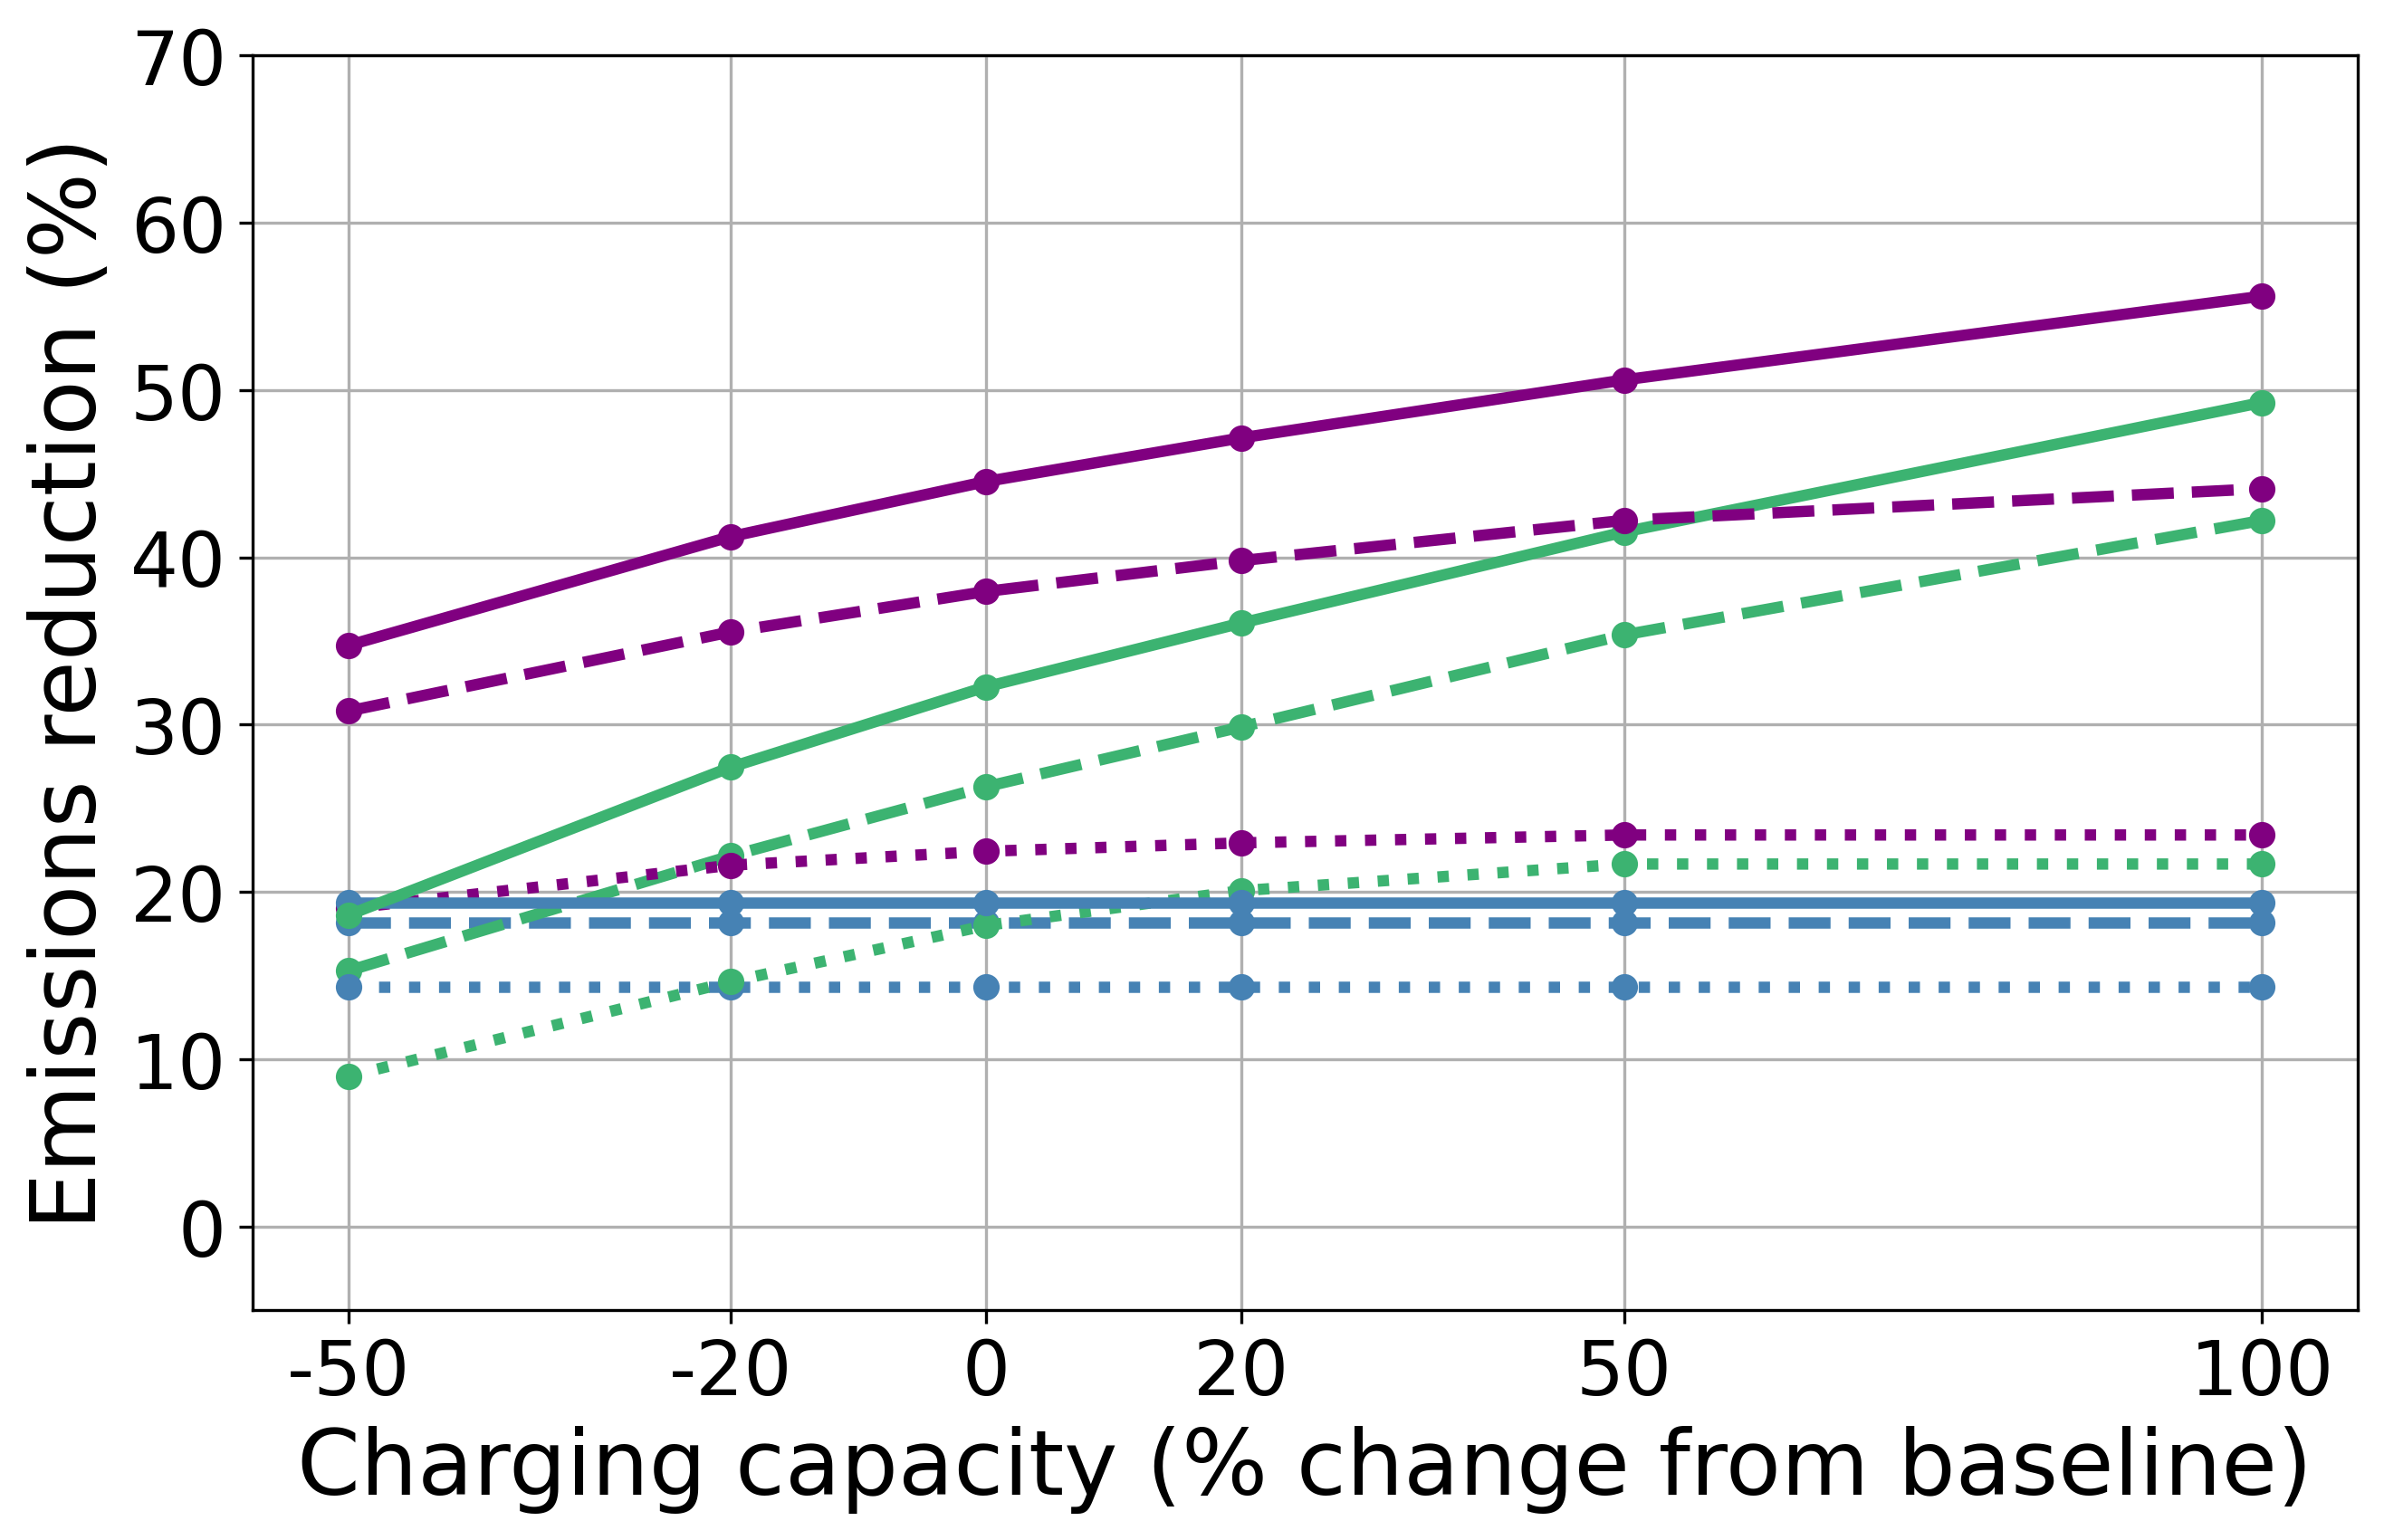

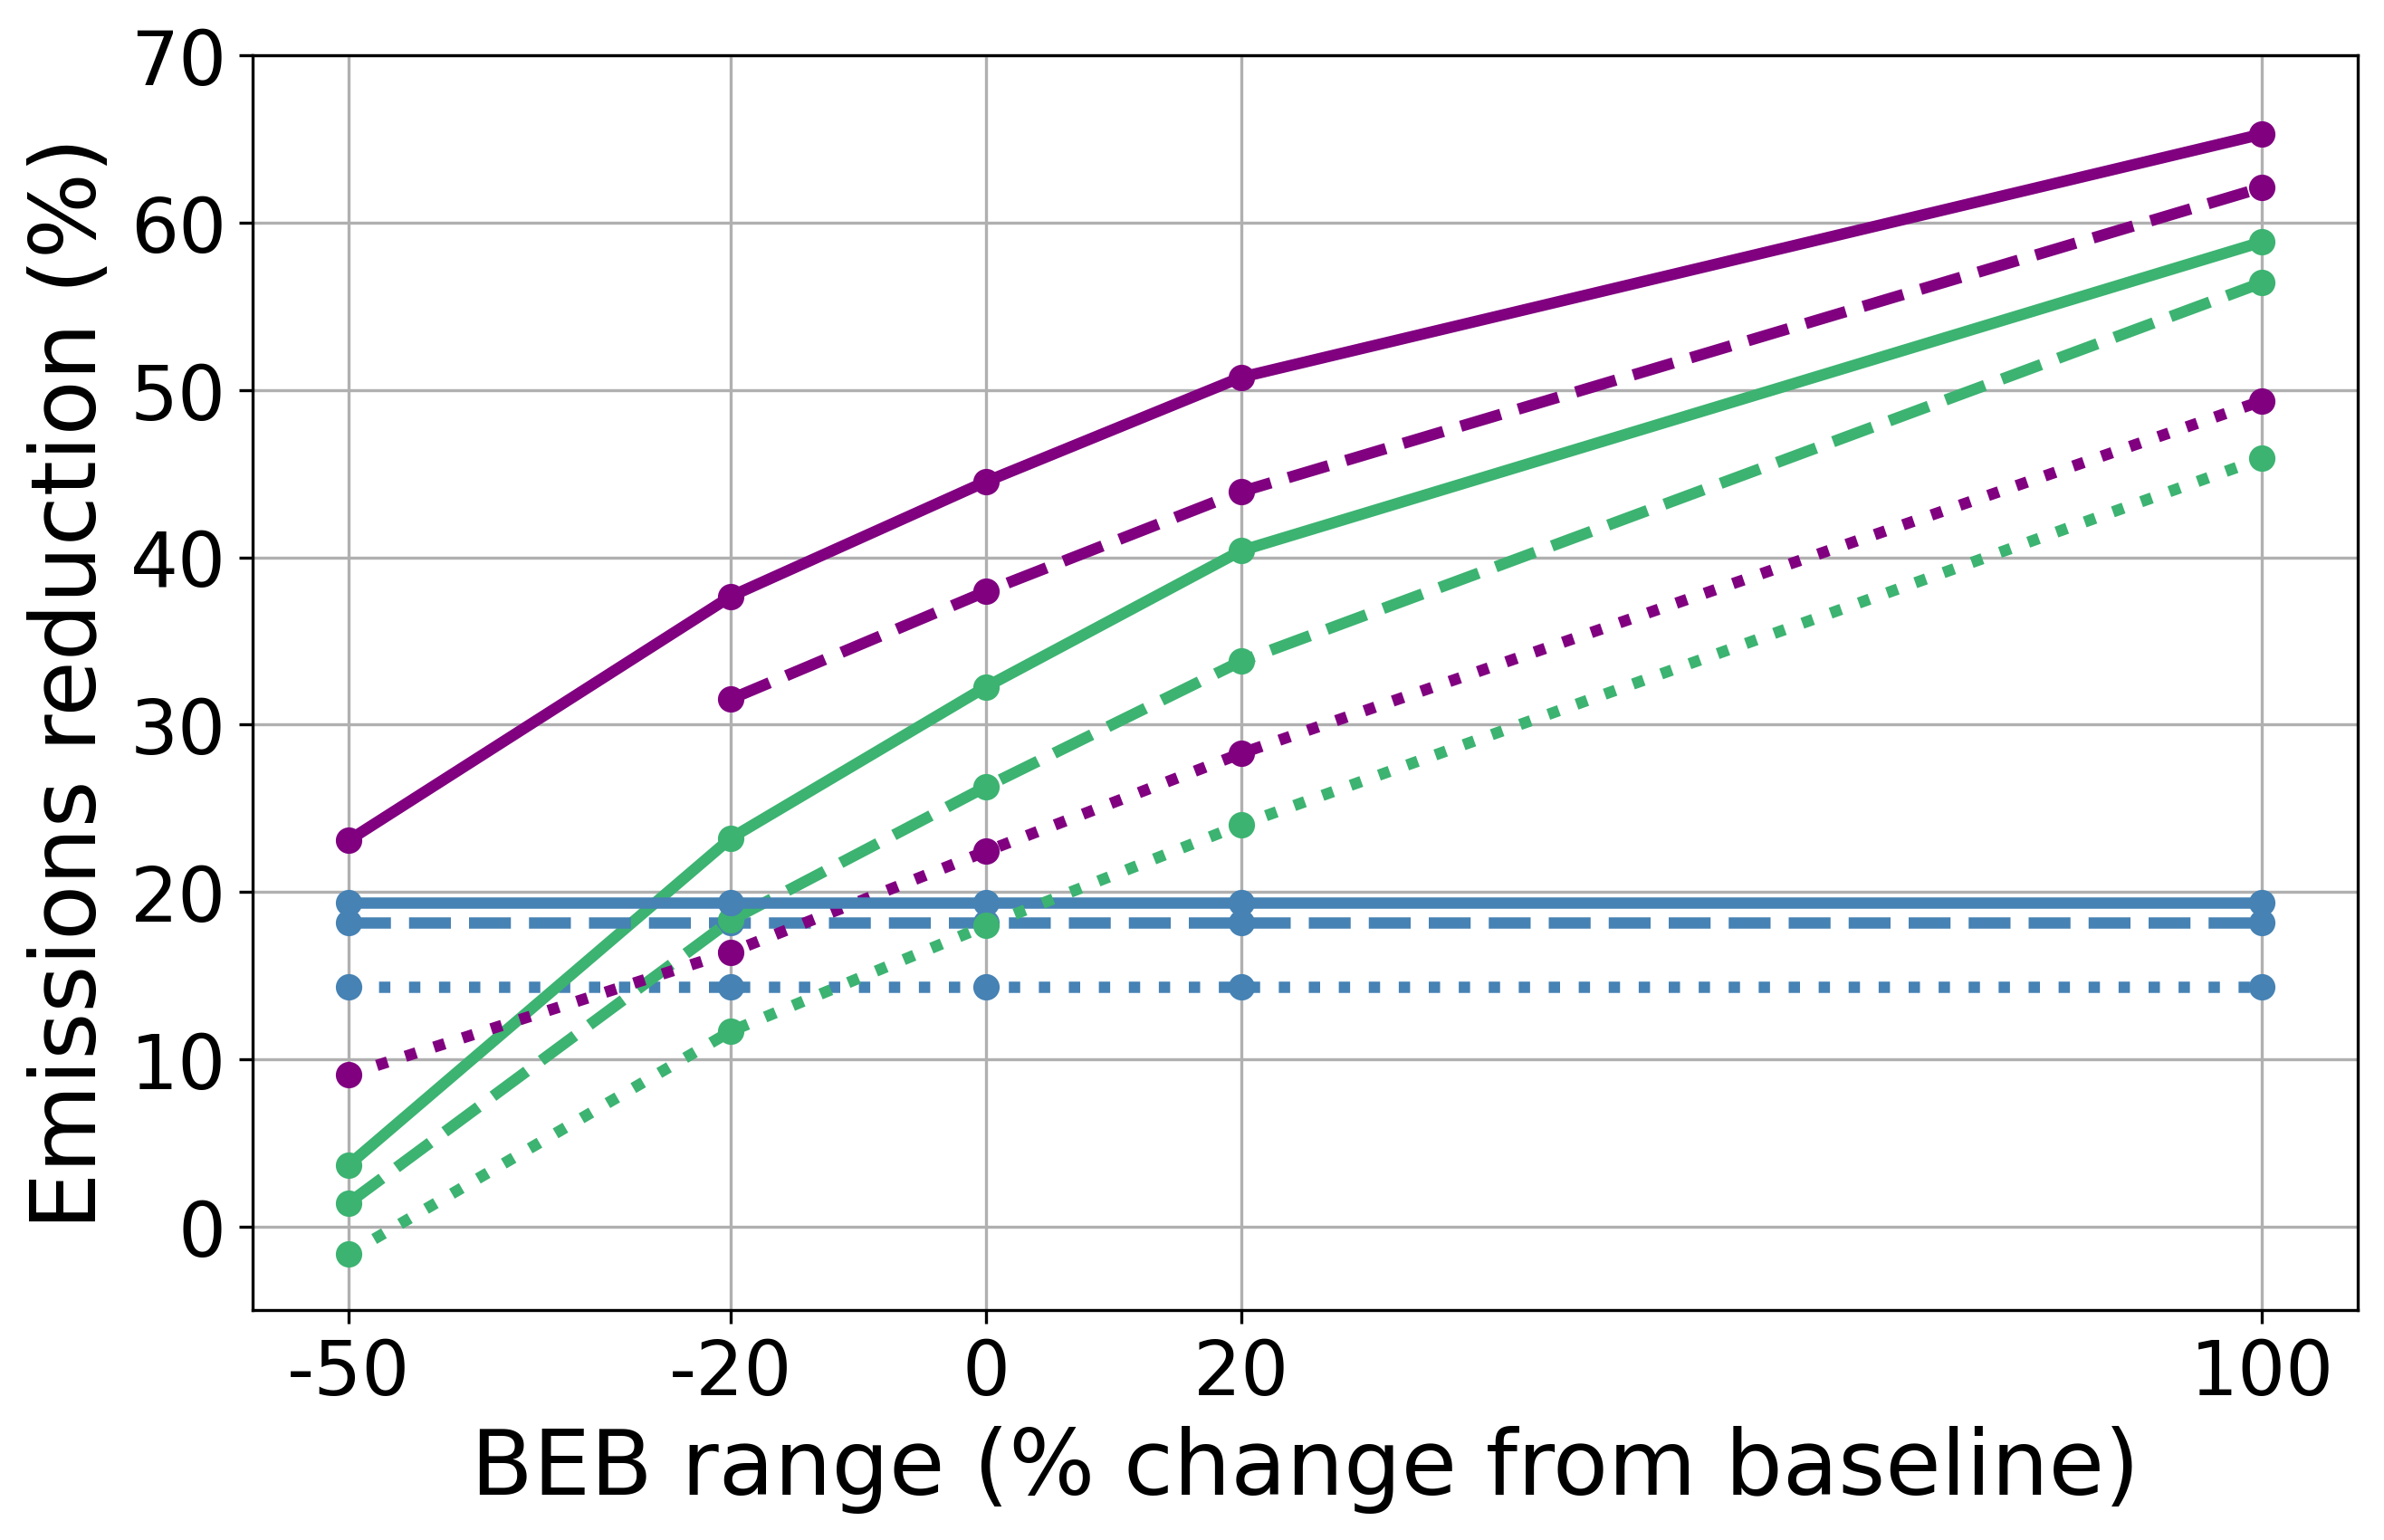

In [101]:
import matplotlib.pyplot as plt

# Define color mapping and line styles
custom_palette = {
    'Status quo': 'red',
    'lo-cap Hybrid': 'steelblue',
    'mid-cap Hybrid': 'steelblue',
    'hi-cap Hybrid': 'steelblue',
    'lo-cap Hybrid+Electric': 'purple',
    'mid-cap Hybrid+Electric': 'purple',
    'hi-cap Hybrid+Electric': 'purple',
    'lo-cap Electric': 'mediumseagreen',
    'mid-cap Electric': 'mediumseagreen',
    'hi-cap Electric': 'mediumseagreen'
}

custom_linestyles = {
    'Status quo': 'dotted',
    'lo-cap Hybrid': 'dotted',
    'lo-cap Hybrid+Electric': 'dotted',
    'lo-cap Electric': 'dotted',
    'mid-cap Hybrid': 'dashed',
    'mid-cap Hybrid+Electric': 'dashed',
    'mid-cap Electric': 'dashed',
    'hi-cap Hybrid': 'solid',
    'hi-cap Hybrid+Electric': 'solid',
    'hi-cap Electric': 'solid',
}

# Separate Charging Capacity and Electric Bus Range data
charging_capacity_df = aggregated_df_relative[aggregated_df_relative["Sensitivity-Scenario"].str.contains("Charging Capacity|Baseline")].copy()
electric_bus_range_df = aggregated_df_relative[aggregated_df_relative["Sensitivity-Scenario"].str.contains("Electric Bus Range|Baseline")].copy()

# Define scenario mappings
charging_capacity_scenario_mapping = {
    "-50% Charging Capacity": -50,
    "-20% Charging Capacity": -20,
    "Baseline": 0,
    "+20% Charging Capacity": 20,
    "+50% Charging Capacity": 50,
    "+100% Charging Capacity": 100
}

electric_bus_range_scenario_mapping = {
    "-50% Electric Bus Range": -50,
    "-20% Electric Bus Range": -20,
    "Baseline": 0,
    "+20% Electric Bus Range": 20,
    "+100% Electric Bus Range": 100
}

# Sort data based on correct order
charging_capacity_df["Scenario_Order"] = charging_capacity_df["Sensitivity-Scenario"].apply(lambda x: list(charging_capacity_scenario_mapping.keys()).index(x))
electric_bus_range_df["Scenario_Order"] = electric_bus_range_df["Sensitivity-Scenario"].apply(lambda x: list(electric_bus_range_scenario_mapping.keys()).index(x))

charging_capacity_df = charging_capacity_df.sort_values(by="Scenario_Order")
electric_bus_range_df = electric_bus_range_df.sort_values(by="Scenario_Order")

# Plot for Charging Capacity Variation
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for future in charging_capacity_df["Future"].unique():
    subset = charging_capacity_df[charging_capacity_df["Future"] == future].sort_values(by="Scenario_Order")
    x_values = [charging_capacity_scenario_mapping[sc] for sc in subset["Sensitivity-Scenario"]]
    y_values = subset["emissions_reduction_percent"]
    ax.plot(
        x_values, y_values, marker='o', 
        linestyle=custom_linestyles.get(future, 'solid'), 
        color=custom_palette.get(future, "black"),
        linewidth = 3
    )

ax.set_xticks([-50, -20, 0, 20, 50, 100])
ax.set_xticklabels(["-50","-20", "0", "20", "50","100"], fontsize=20)
ax.set_xlabel("Charging capacity (% change from baseline)", fontsize=24)
ax.set_ylabel("Emissions reduction (%)", fontsize=24)
ax.tick_params(axis='both', labelsize=20)  
ax.set_ylim(-5, 70)
ax.grid(True)

plt.show()

# Plot for Electric Bus Range Variation
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for future in electric_bus_range_df["Future"].unique():
    subset = electric_bus_range_df[electric_bus_range_df["Future"] == future].sort_values(by="Scenario_Order")
    x_values = [electric_bus_range_scenario_mapping[sc] for sc in subset["Sensitivity-Scenario"]]
    y_values = subset["emissions_reduction_percent"]
    ax.plot(
        x_values, y_values, marker='o', 
        linestyle=custom_linestyles.get(future, 'solid'), 
        color=custom_palette.get(future, "black"),
        linewidth = 3
    )

ax.set_xticks([-50, -20, 0, 20, 100])
ax.set_xticklabels(["-50", "-20", "0", "20", "100"], fontsize=20)
ax.set_xlabel("BEB range (% change from baseline)", fontsize=24)
ax.set_ylabel("Emissions reduction (%)", fontsize=24)
ax.tick_params(axis='both', labelsize=20)  
ax.set_ylim(-5, 70)
ax.grid(True)

plt.show()


In [95]:
aggregated_df_relative.loc[aggregated_df_relative['Future']=='mid-cap Electric']

,Sensitivity-Scenario,Future,Result,emissions,emissions_reduction_percent
6,+100% Charging Capacity,mid-cap Electric,22159.617102,250.508931,42.206123
15,+100% Electric Bus Range,mid-cap Electric,16712.255092,188.927866,56.413236
24,+20% Charging Capacity,mid-cap Electric,26892.516170,304.013172,29.862382
33,+20% Electric Bus Range,mid-cap Electric,25384.235313,286.962434,33.796087
42,+50% Charging Capacity,mid-cap Electric,24784.417512,280.181644,35.360455
51,-20% Charging Capacity,mid-cap Electric,29846.823080,337.410873,22.157337
60,-20% Electric Bus Range,mid-cap Electric,31322.112620,354.088653,18.309676
69,-50% Charging Capacity,mid-cap Electric,32481.548069,367.195781,15.285785
78,-50% Electric Bus Range,mid-cap Electric,37807.803193,427.407763,1.394528
86,Baseline,mid-cap Electric,28261.894445,319.493651,26.290945


In [96]:
A = [1,0,0,3,1]
print(len(A))

5


In [97]:
A[-2]

3